<a href="https://colab.research.google.com/github/Yehia15/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Market/blob/main/prosper_loan_predictive_model_(Team_A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team A**

#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
import pickle

In [ ]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.utils import np_utils
from keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.6 MB/s 
     |████████████████████████████████| 133 kB 39.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7d322bbee053c4639e562d18b33a25ce7f4f123e4e8a59da829d474af1ceb2ea
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


# Reading Data From Drive

In [ ]:
# Code to read file into Colaboratory:
! pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/17Gnd26xox3nK2fyOCUyN41yRPht5LeSQ/view?usp=sharing' # The shareable link
# to get the id part of the file
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('prosperLoanData.csv')

In [ ]:
dataframe = pd.read_csv('prosperLoanData.csv')

# Data Exploration 

In [ ]:
print(dataframe.shape)

(113937, 81)


In [ ]:
dataframe.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

# Data Cleaning

## Checking Null values

In [ ]:
pd.set_option('display.max_rows', None)
missing_percent = dataframe.isnull().sum() * 100 / len(dataframe)                 
missing_value_data = pd.DataFrame({'Missing Count':dataframe.isnull().sum(),
    'Missing Percent': missing_percent})
missing_value_data.sort_values(['Missing Percent'], ascending=False)

Missing Count  Missing Percent
GroupKey                                    100596        88.290898
LoanFirstDefaultedCycleNumber                96985        85.121602
ScorexChangeAtTimeOfListing                  95009        83.387311
ProsperPrincipalOutstanding                  91852        80.616481
ProsperPrincipalBorrowed                     91852        80.616481
ProsperPaymentsOneMonthPlusLate              91852        80.616481
ProsperPaymentsLessThanOneMonthLate          91852        80.616481
OnTimeProsperPayments                        91852        80.616481
TotalProsperLoans                            91852        80.616481
TotalProsperPaymentsBilled                   91852        80.616481
CreditGrade                                  84984        74.588588
ClosedDate                                   58848        51.649596
ProsperRating (Alpha)                        29084        25.526387
ProsperScore                                 29084        25.526387
EstimatedReturn                              29084        25.526387
ProsperRating (numeric)                      29084        25.526387
EstimatedLoss                                29084        25.526387
EstimatedEffectiveYield                      29084        25.526387
DebtToIncomeRatio                             8554         7.507658
EmploymentStatusDuration                      7625         6.692295
AmountDelinquent                              7622         6.689662
CurrentCreditLines                            7604         6.673864
BankcardUtilization                           7604         6.673864
PublicRecordsLast12Months                     7604         6.673864
OpenCreditLines                               7604         6.673864
RevolvingCreditBalance                        7604         6.673864
TotalTrades                                   7544         6.621203
TradesOpenedLast6Months                       7544         6.621203
TradesNeverDelinquent (percentage)            7544         6.621203
AvailableBankcardCredit                       7544         6.621203
BorrowerState                                 5515         4.840394
Occupation                                    3588         3.149109
EmploymentStatus                              2255         1.979164
TotalInquiries                                1159         1.017229
DelinquenciesLast7Years                        990         0.868901
FirstRecordedCreditLine                        697         0.611742
PublicRecordsLast10Years                       697         0.611742
TotalCreditLinespast7years                     697         0.611742
CurrentDelinquencies                           697         0.611742
InquiriesLast6Months                           697         0.611742
CreditScoreRangeUpper                          591         0.518708
CreditScoreRangeLower                          591         0.518708
BorrowerAPR                                     25         0.021942
LoanOriginalAmount                               0         0.000000
InvestmentFromFriendsAmount                      0         0.000000
InvestmentFromFriendsCount                       0         0.000000
Recommendations                                  0         0.000000
PercentFunded                                    0         0.000000
LP_NonPrincipalRecoverypayments                  0         0.000000
LP_NetPrincipalLoss                              0         0.000000
LP_CollectionFees                                0         0.000000
LoanOriginationDate                              0         0.000000
LP_GrossPrincipalLoss                            0         0.000000
MemberKey                                        0         0.000000
MonthlyLoanPayment                               0         0.000000
LP_ServiceFees                                   0         0.000000
LoanNumber                                       0         0.000000
LP_InterestandFees                               0         0.000000
LP_CustomerPrincipalPayme

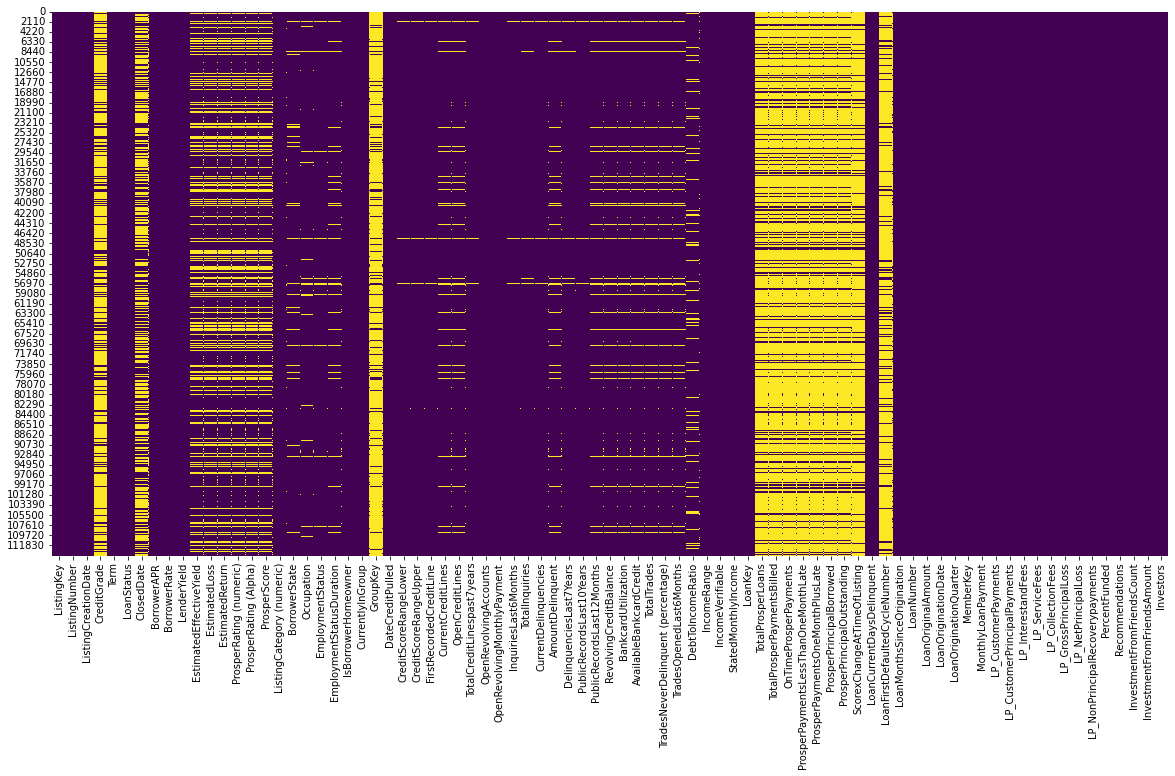

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.isnull(),cbar=False,cmap='viridis')

## Statistical Summary 

In [ ]:
dataframe.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

##Cleaning and handling missing values

###ListingCreationDate

In [ ]:
dataframe['ListingCreationDate'] = pd.to_datetime(dataframe['ListingCreationDate'], format='%Y-%m-%d %H:%M:%S')

###DateCreditPulled

In [ ]:
dataframe['DateCreditPulled'] = pd.to_datetime(dataframe['DateCreditPulled'], format='%Y-%m-%d %H:%M:%S')

###LoanOriginationDate

In [ ]:
dataframe['LoanOriginationDate'] = pd.to_datetime(dataframe['LoanOriginationDate'], format='%Y-%m-%d %H:%M:%S')

###FirstRecordedCreditLine

In [ ]:
dataframe['FirstRecordedCreditLine'] = pd.to_datetime(dataframe['FirstRecordedCreditLine'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
print(dataframe.FirstRecordedCreditLine.max())
print(dataframe.FirstRecordedCreditLine.min())

2012-12-22 00:00:00
1947-08-24 00:00:00


since the max is 2012 and the min 1947 .So, we can fill the missing dates by adding future date (for example 2023) 

In [ ]:
dataframe.FirstRecordedCreditLine.fillna('2023-01-01 00:00:00', inplace=True)

###ClosedDate

In [ ]:
dataframe['ClosedDate'] = pd.to_datetime(dataframe['ClosedDate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
print(dataframe.ClosedDate.max())
print(dataframe.ClosedDate.min())

2014-03-10 00:00:00
2005-11-25 00:00:00


since the max is 2014 and the min 2005 .So, we can fill the missing dates by adding future date (for example 2023) 

In [ ]:
dataframe.ClosedDate.fillna('2023-01-01 00:00:00', inplace=True)

###BorrowerAPR

In [ ]:
dataframe.BorrowerAPR.fillna(dataframe.BorrowerAPR.mean(), inplace=True)

###EstimatedEffectiveYield

In [ ]:
dataframe.EstimatedEffectiveYield.fillna(dataframe.EstimatedEffectiveYield.mean(), inplace=True)

###EstimatedLoss

In [ ]:
dataframe.EstimatedLoss.fillna(dataframe.EstimatedLoss.mean(), inplace=True)

###EstimatedReturn

In [ ]:
dataframe.EstimatedReturn.fillna(dataframe.EstimatedReturn.mean(), inplace=True)

###EmploymentStatusDuration

In [ ]:
dataframe.EmploymentStatusDuration.fillna(dataframe.EmploymentStatusDuration.mean(), inplace=True)

###CreditScoreRangeLower

In [ ]:
dataframe.CreditScoreRangeLower.fillna(dataframe.CreditScoreRangeLower.mean(), inplace=True)

###CreditScoreRangeUpper

In [ ]:
dataframe.CreditScoreRangeUpper.fillna(dataframe.CreditScoreRangeUpper.mean(), inplace=True)

###BorrowerState

In [ ]:
dataframe.BorrowerState.fillna('CA', inplace=True)

###Occupation

In [ ]:
dataframe.Occupation.fillna('Other', inplace=True)

###EmploymentStatus

In [ ]:
dataframe.EmploymentStatus.fillna('Unknown', inplace=True)

###CreditGrade

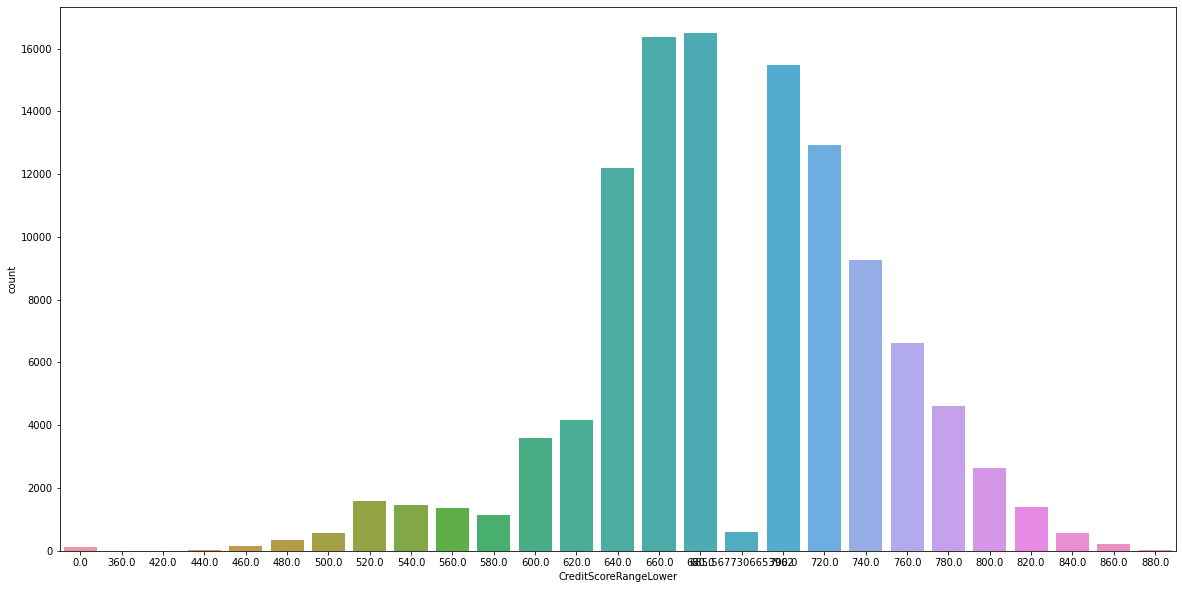

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=dataframe['CreditScoreRangeLower'])

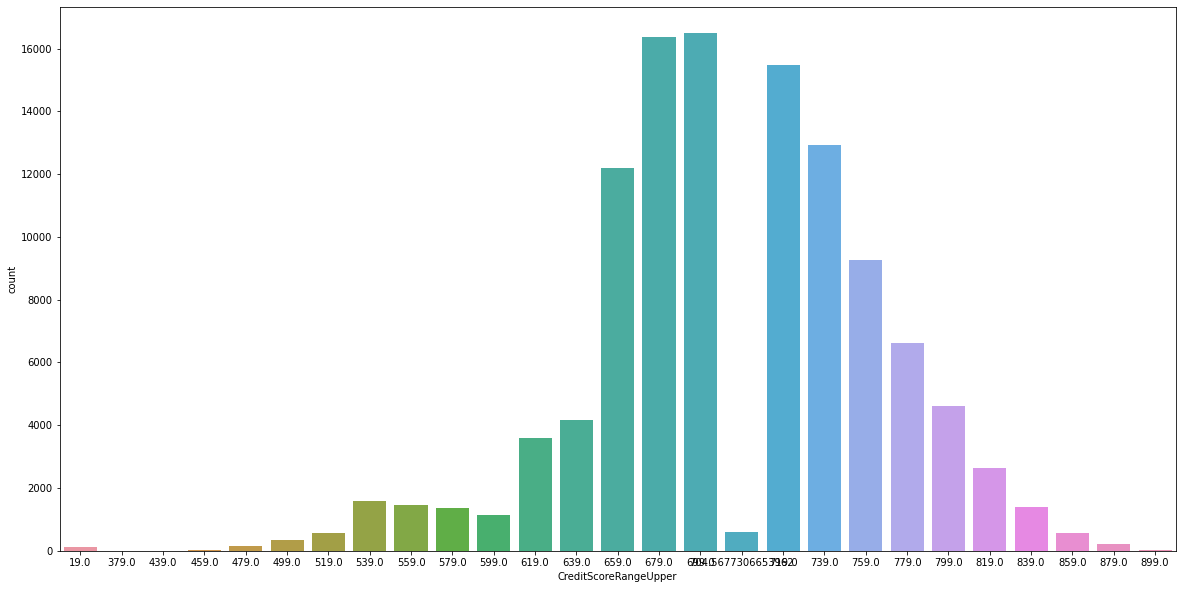

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=dataframe['CreditScoreRangeUpper'])

In [ ]:
dataframe.loc[dataframe.CreditScoreRangeLower < 300, 'CreditGrade'] = 'NC'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 300) & (dataframe.CreditScoreRangeUpper <= 559), 'CreditGrade'] = 'HR'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 560) & (dataframe.CreditScoreRangeUpper <= 599), 'CreditGrade'] = 'E'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 600) & (dataframe.CreditScoreRangeUpper <= 639), 'CreditGrade'] = 'D'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 640) & (dataframe.CreditScoreRangeUpper <= 679), 'CreditGrade'] = 'C'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 680) & (dataframe.CreditScoreRangeUpper <= 719), 'CreditGrade'] = 'B'
dataframe.loc[(dataframe.CreditScoreRangeLower >= 720) & (dataframe.CreditScoreRangeUpper <= 759), 'CreditGrade'] = 'A'
dataframe.loc[dataframe.CreditScoreRangeLower > 759, 'CreditGrade'] = 'AA'

###Columns to be filled by 0

* TotalProsperLoans
* TotalProsperPaymentsBilled
* OnTimeProsperPayments
* ProsperPaymentsLessThanOneMonthLate
* ProsperPaymentsOneMonthPlusLate
* ProsperPrincipalBorrowed
* ProsperPrincipalOutstanding
* ScorexChangeAtTimeOfListing
* CurrentCreditLines
* OpenCreditLines
* TotalCreditLinespast7years 
* InquiriesLast6Months
* TotalInquiries
* CurrentDelinquencies
* AmountDelinquent
* DelinquenciesLast7Years
* PublicRecordsLast10Years
* PublicRecordsLast12Months

In [ ]:
cols_filled_by_0= ['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing','CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months']
dataframe[cols_filled_by_0] = dataframe[cols_filled_by_0].fillna(0)

###Columns to be filled by mean

* RevolvingCreditBalance
* BankcardUtilization
* AvailableBankcardCredit
* TotalTrades
* TradesNeverDelinquent (percentage)
* TradesOpenedLast6Months
* DebtToIncomeRatio

In [ ]:
cols_filled_by_mean = ['RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio' ]
for x in cols_filled_by_mean:
  dataframe[x].fillna(dataframe[x].mean(), inplace=True)

###LoanFirstDefaultedCycleNumber

In [ ]:
dataframe.LoanFirstDefaultedCycleNumber.fillna(-1, inplace=True)

###Columns to be dropped

Columns are dropped because they are labels or keys or they have alot of missing values (Groupkey 90%)
* GroupKey
* LisitingKey
* LisitingNumber
* LoanKey
* MemberKey
* LoanNumber

In [ ]:
dataframe.drop('GroupKey', axis=1, inplace=True)
dataframe.drop('ListingKey', axis=1, inplace=True)
dataframe.drop('ListingNumber', axis=1, inplace=True)
dataframe.drop('LoanKey', axis=1, inplace=True)
dataframe.drop('MemberKey', axis=1, inplace=True)
dataframe.drop('LoanNumber', axis=1, inplace=True)

###Samples to be removed

will remove any sample will not have any of these features
* ProsperRating (numeric)
* ProsperScore
* ProsperRating (Alpha)

In [ ]:
dataframe = dataframe[dataframe['ProsperRating (Alpha)'].notnull()]
dataframe = dataframe[dataframe['ProsperRating (numeric)'].notnull()]
dataframe = dataframe[dataframe['ProsperScore'].notnull()]

In [ ]:
dataframe.shape

(84853, 75)

##Missing Percent after applying data cleaning

In [ ]:
pd.set_option('display.max_rows', None)
missing_percent = dataframe.isnull().sum() * 100 / len(dataframe)                 
missing_value_data = pd.DataFrame({'Missing Count':dataframe.isnull().sum(),
    'Missing Percent': missing_percent})
missing_value_data.sort_values(['Missing Percent'], ascending=False)

Missing Count  Missing Percent
ListingCreationDate                              0              0.0
LoanFirstDefaultedCycleNumber                    0              0.0
ScorexChangeAtTimeOfListing                      0              0.0
ProsperPrincipalOutstanding                      0              0.0
ProsperPrincipalBorrowed                         0              0.0
ProsperPaymentsOneMonthPlusLate                  0              0.0
ProsperPaymentsLessThanOneMonthLate              0              0.0
OnTimeProsperPayments                            0              0.0
TotalProsperPaymentsBilled                       0              0.0
TotalProsperLoans                                0              0.0
StatedMonthlyIncome                              0              0.0
IncomeVerifiable                                 0              0.0
IncomeRange                                      0              0.0
DebtToIncomeRatio                                0              0.0
TradesOpenedLast6Months                          0              0.0
TradesNeverDelinquent (percentage)               0              0.0
TotalTrades                                      0              0.0
LoanCurrentDaysDelinquent                        0              0.0
LoanMonthsSinceOrigination                       0              0.0
BankcardUtilization                              0              0.0
LoanOriginalAmount                               0              0.0
InvestmentFromFriendsAmount                      0              0.0
InvestmentFromFriendsCount                       0              0.0
Recommendations                                  0              0.0
PercentFunded                                    0              0.0
LP_NonPrincipalRecoverypayments                  0              0.0
LP_NetPrincipalLoss                              0              0.0
LP_GrossPrincipalLoss                            0              0.0
LP_CollectionFees                                0              0.0
LP_ServiceFees                                   0              0.0
LP_InterestandFees                               0              0.0
LP_CustomerPrincipalPayments                     0              0.0
LP_CustomerPayments                              0              0.0
MonthlyLoanPayment                               0              0.0
LoanOriginationQuarter                           0              0.0
LoanOriginationDate                              0              0.0
AvailableBankcardCredit                          0              0.0
RevolvingCreditBalance                           0              0.0
CreditGrade                                      0              0.0
EmploymentStatusDuration                         0              0.0
Occupation                                       0              0.0
BorrowerState                                    0              0.0
ListingCategory (numeric)                        0              0.0
ProsperScore                                     0              0.0
ProsperRating (Alpha)                            0              0.0
ProsperRating (numeric)                          0              0.0
EstimatedReturn                                  0              0.0
EstimatedLoss                                    0              0.0
EstimatedEffectiveYield                          0              0.0
LenderYield                                      0              0.0
BorrowerRate                                     0              0.0
BorrowerAPR                                      0              0.0
ClosedDate                                       0              0.0
LoanStatus                                       0              0.0
Term                                             0              0.0
EmploymentStatus                                 0              0.0
IsBorrowerHomeowner                              0              0.0
PublicRecordsLast12Months                        0              0.0
CurrentlyInGroup         

# Data Visualization


##Histograms for numeric datatypes 

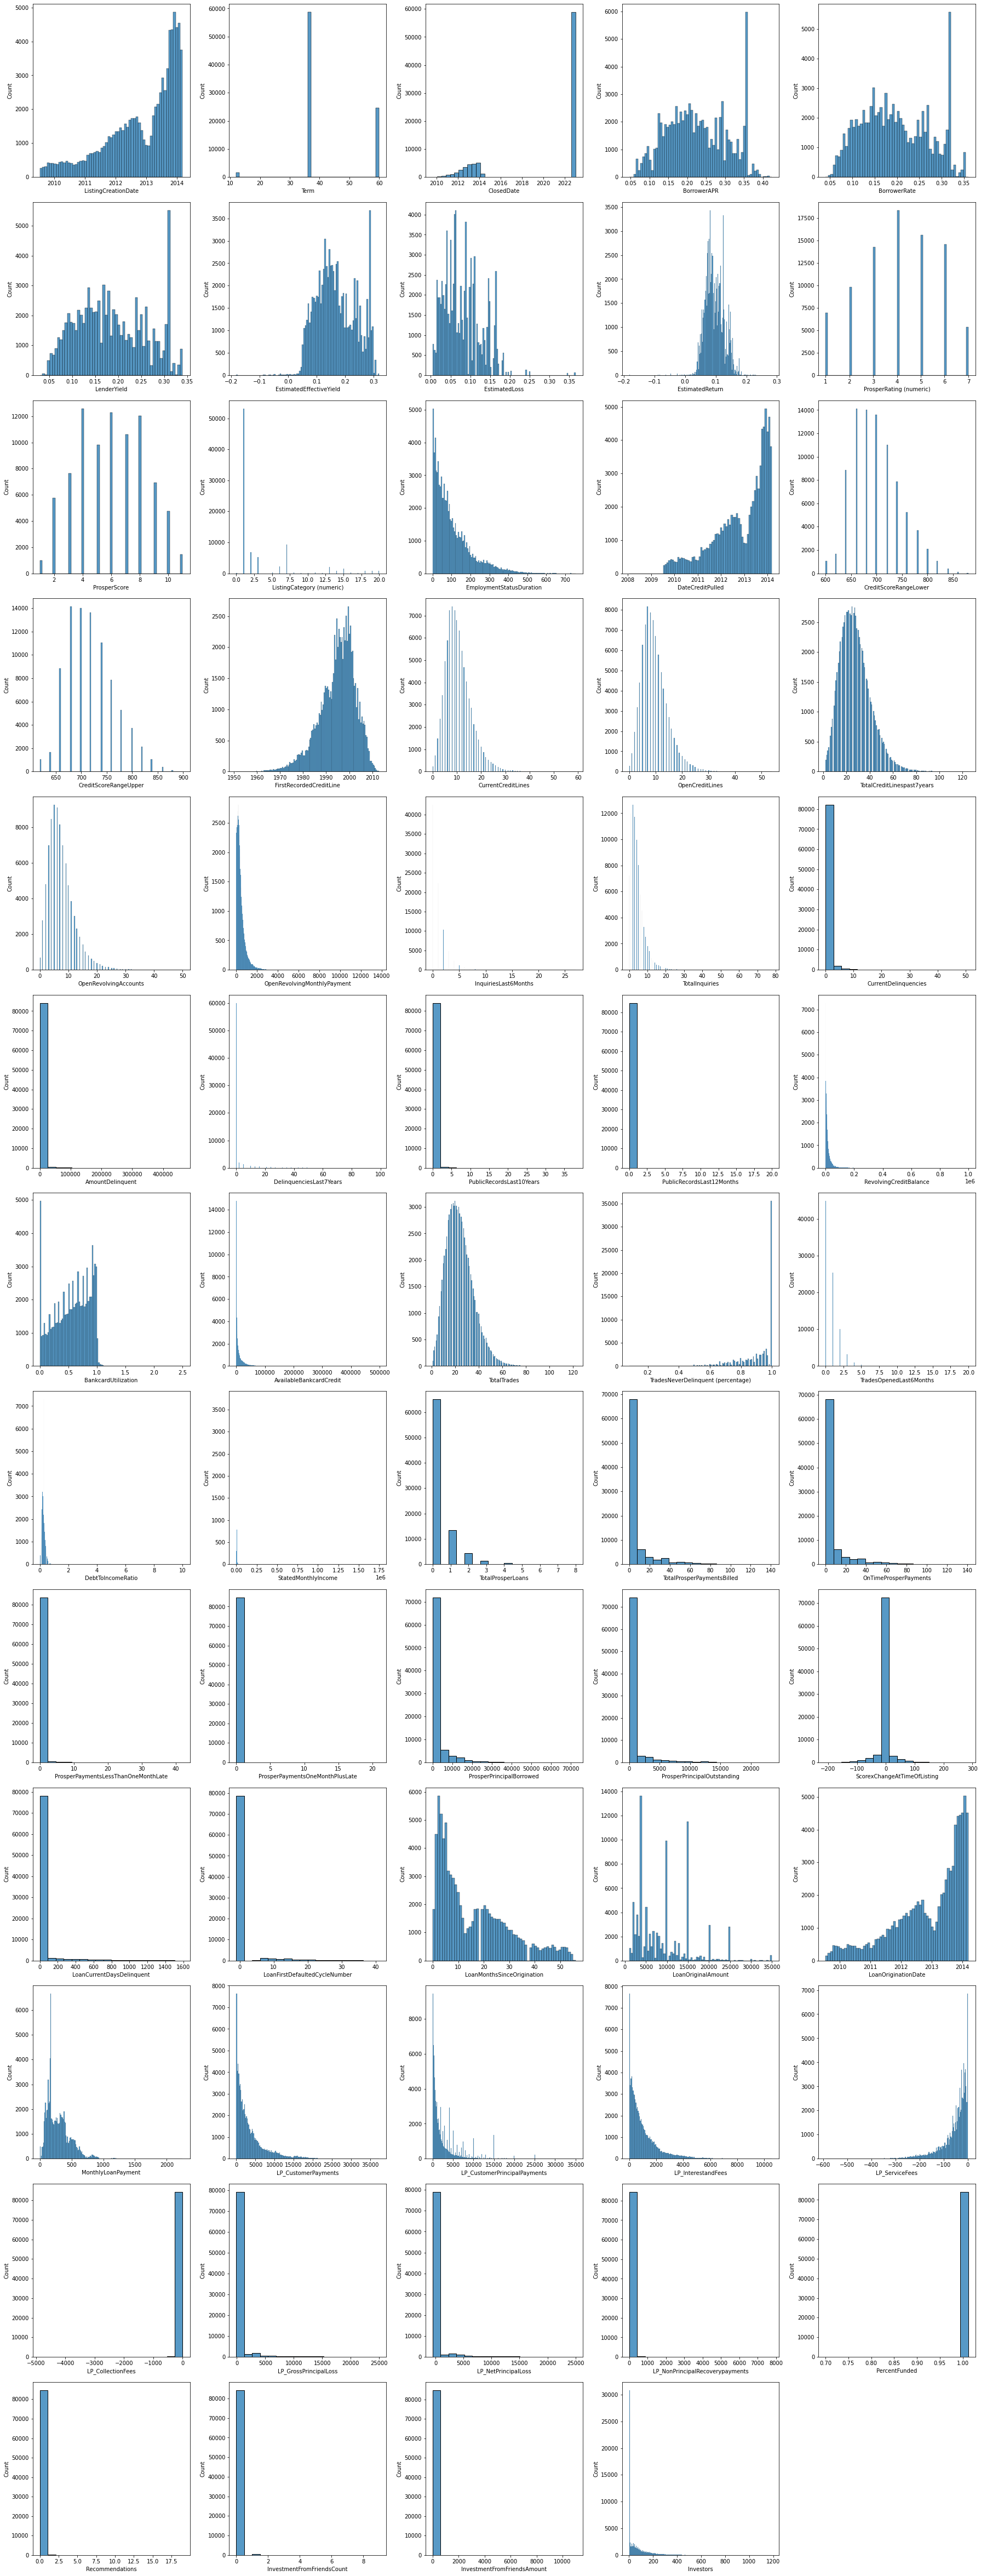

In [ ]:
cols = 5
rows = 14
num_cols = dataframe.select_dtypes(exclude=['object','bool']).columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.histplot(x = dataframe[col], ax = ax)
fig.tight_layout()  
plt.show()

##Count plot for object datatypes 

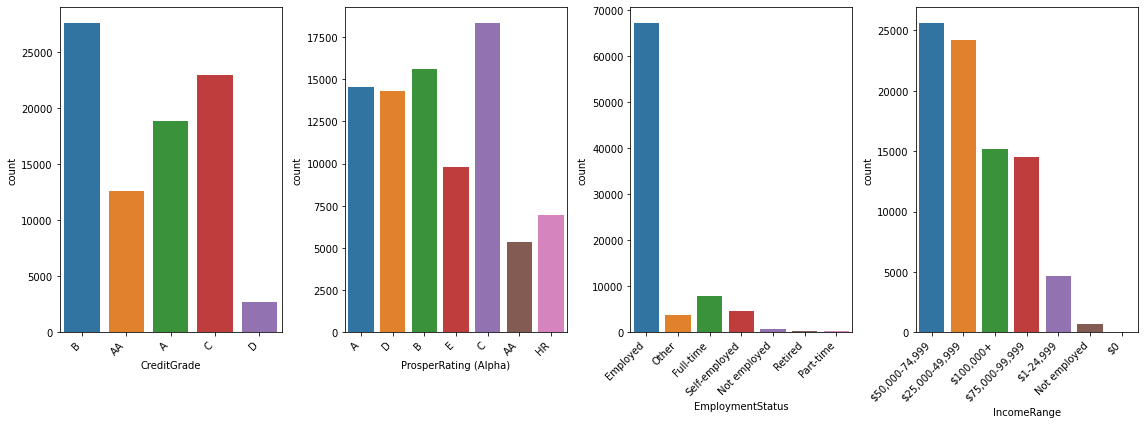

In [ ]:
cols = 4
rows = 1
fig = plt.figure(figsize= (16,6))
all_categs = dataframe.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=dataframe[col], ax=ax)
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()

##CreditGrade

### unique values

In [ ]:
dataframe['CreditGrade'].unique()

array(['B', 'AA', 'A', 'C', 'D'], dtype=object)

###Count plot

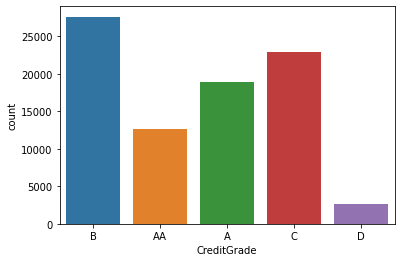

In [ ]:
sns.countplot(x=dataframe['CreditGrade'])

##Amountdeliquency

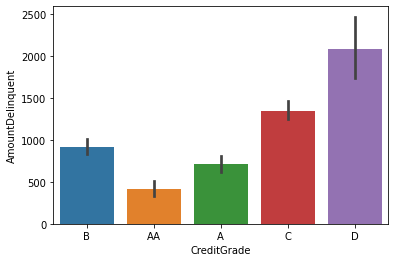

In [ ]:
sns.barplot(x=dataframe['CreditGrade'], y=dataframe['AmountDelinquent'])

##Loan Status

### unique values

In [ ]:
dataframe['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

###Pie chart

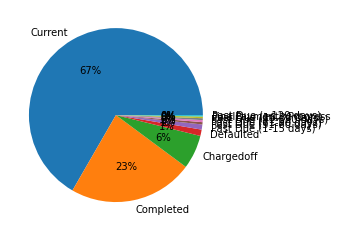

In [ ]:
df = dataframe['LoanStatus'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%");

##BorrowerRate

###unique values

In [ ]:
dataframe['BorrowerRate'].unique()

array([0.092 , 0.0974, 0.2085, ..., 0.0595, 0.1157, 0.2665])

###KDE with Histogram plot

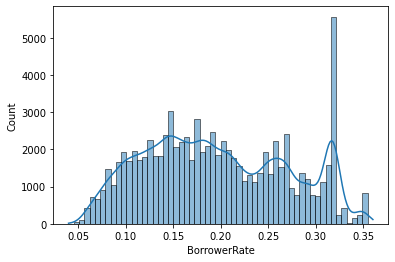

In [ ]:
sns.histplot(dataframe['BorrowerRate'],kde=True);

##LenderYield

###unique values

In [ ]:
dataframe['LenderYield'].unique()

array([0.082 , 0.0874, 0.1985, ..., 0.0495, 0.1057, 0.2565])

###KDE with Histogram plot

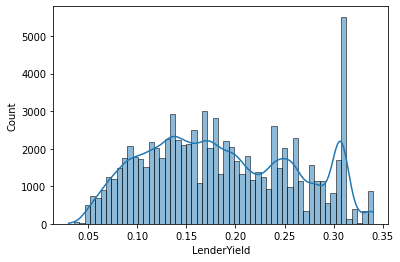

In [ ]:
sns.histplot(dataframe['LenderYield'],kde=True);

##CreditGrade & MonthlyLoanPayment

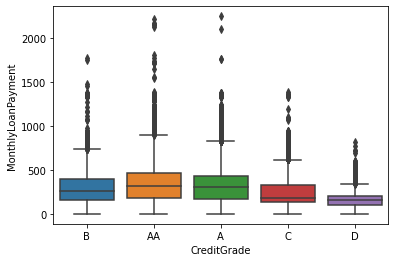

In [ ]:
sns.boxplot(x=dataframe['CreditGrade'], y=dataframe['MonthlyLoanPayment'])

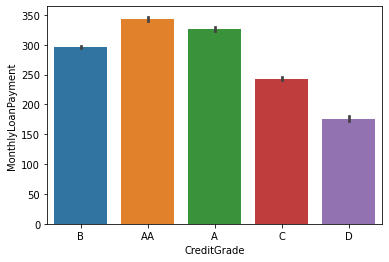

In [ ]:
sns.barplot(x=dataframe['CreditGrade'], y=dataframe['MonthlyLoanPayment'])

##CreditGrade & Completed LoanStatus

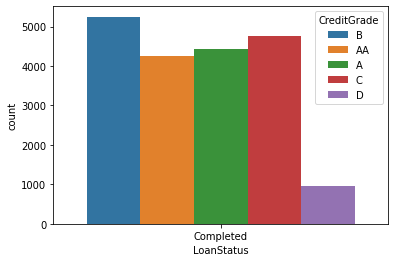

In [ ]:
loan = dataframe.loc[dataframe.LoanStatus == 'Completed']
sns.countplot(x=loan['LoanStatus'], hue=dataframe['CreditGrade'])

### CreditGrade & (BorrowerRate,BorrowerAPR)

###BorrowerRate

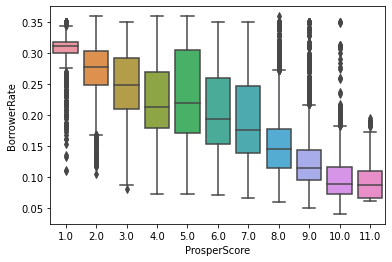

In [ ]:
sns.boxplot(x=dataframe['ProsperScore'], y=dataframe['BorrowerRate'])

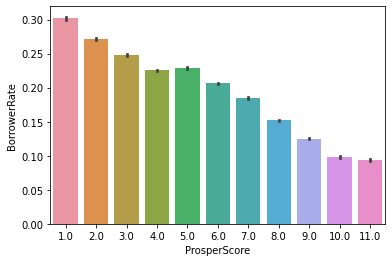

In [ ]:
sns.barplot(x=dataframe['ProsperScore'], y=dataframe['BorrowerRate'])

###BorrowerAPR

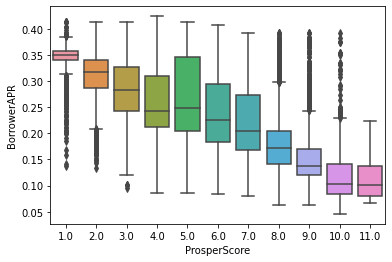

In [ ]:
sns.boxplot(x=dataframe['ProsperScore'], y=dataframe['BorrowerAPR'])

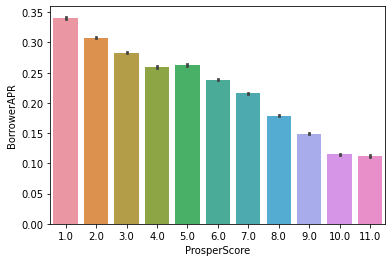

In [ ]:
sns.barplot(x=dataframe['ProsperScore'], y=dataframe['BorrowerAPR'])

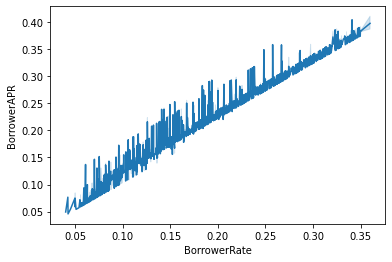

In [ ]:
sns.lineplot(x=dataframe['BorrowerRate'], y=dataframe['BorrowerAPR'])

#Feature Engineering

##Checking Correlation 

In [ ]:
dataframe.corr()

Term  BorrowerAPR  BorrowerRate  \
Term                                 1.000000    -0.068132     -0.000118   
BorrowerAPR                         -0.068132     1.000000      0.993333   
BorrowerRate                        -0.000118     0.993333      1.000000   
LenderYield                         -0.000086     0.993334      0.999996   
EstimatedEffectiveYield              0.057047     0.895635      0.895282   
EstimatedLoss                       -0.107140     0.949538      0.945297   
EstimatedReturn                      0.152505     0.794275      0.817670   
ProsperRating (numeric)              0.079179    -0.962151     -0.953105   
ProsperScore                         0.028947    -0.668287     -0.649736   
ListingCategory (numeric)           -0.063268     0.108784      0.103641   
EmploymentStatusDuration             0.052558    -0.039140     -0.039182   
IsBorrowerHomeowner                  0.076061    -0.134957     -0.126180   
CurrentlyInGroup                    -0.043745     0.007251      0.011408   
CreditScoreRangeLower                0.050316    -0.525888     -0.508681   
CreditScoreRangeUpper                0.050316    -0.525888     -0.508681   
CurrentCreditLines                   0.071281    -0.109599     -0.107962   
OpenCreditLines                      0.082842    -0.127478     -0.125960   
TotalCreditLinespast7years           0.056436    -0.033496     -0.031819   
OpenRevolvingAccounts                0.064188    -0.139307     -0.139085   
OpenRevolvingMonthlyPayment          0.063791    -0.070656     -0.071608   
InquiriesLast6Months                -0.049884     0.260195      0.257486   
TotalInquiries                      -0.018870     0.175069      0.174344   
CurrentDelinquencies                -0.043779     0.153815      0.149515   
AmountDelinquent                    -0.015793     0.054715      0.052144   
DelinquenciesLast7Years             -0.024476     0.147453      0.142086   
PublicRecordsLast10Years            -0.016089     0.118509      0.113537   
PublicRecordsLast12Months           -0.010850     0.039530      0.039118   
RevolvingCreditBalance               0.025455    -0.065445     -0.065356   
BankcardUtilization                  0.032942     0.247020      0.238980   
AvailableBankcardCredit              0.013166    -0.371769     -0.359901   
TotalTrades                          0.060489    -0.073594     -0.071421   
TradesNeverDelinquent (percentage)   0.076342    -0.271338     -0.264302   
TradesOpenedLast6Months              0.003088     0.143948      0.141417   
DebtToIncomeRatio                   -0.000966     0.123871      0.121476   
IncomeVerifiable                     0.066396    -0.119105     -0.113667   
StatedMonthlyIncome                  0.009257    -0.093926     -0.093481   
TotalProsperLoans                    0.002209    -0.047870     -0.044298   
TotalProsperPaymentsBilled          -0.019670    -0.023167     -0.020480   
OnTimeProsperPayments               -0.019247    -0.027466     -0.024681   
ProsperPaymentsLessThanOneMonthLate -0.008548     0.034161      0.034148   
ProsperPaymentsOneMonthPlusLate     -0.006949     0.024663      0.023361   
ProsperPrincipalBorrowed             0.031962    -0.107112     -0.102747   
ProsperPrincipalOutstanding          0.060838    -0.063736     -0.060043   
ScorexChangeAtTimeOfListing         -0.014347    -0.111984     -0.107832   
LoanCurrentDaysDelinquent           -0.070229     0.207689      0.215785   
LoanFirstDefaultedCycleNumber       -0.048027     0.198081      0.206406   
LoanMonthsSinceOrigination          -0.251881     0.234844      0.256583   
LoanOriginalAmount                   0.339117    -0.426361     -0.413466   
MonthlyLoanPayment                   0.055020    -0.321163     -0.331021   
LP_CustomerPayments                 -0.027313    -0.027514     -0.011972   
LP_CustomerPrincipalPayments        -0.099870    -0.098540     -0.088867   
LP_InterestandFees                   0.216594     0.211606      0.238692   
LP_ServiceFee

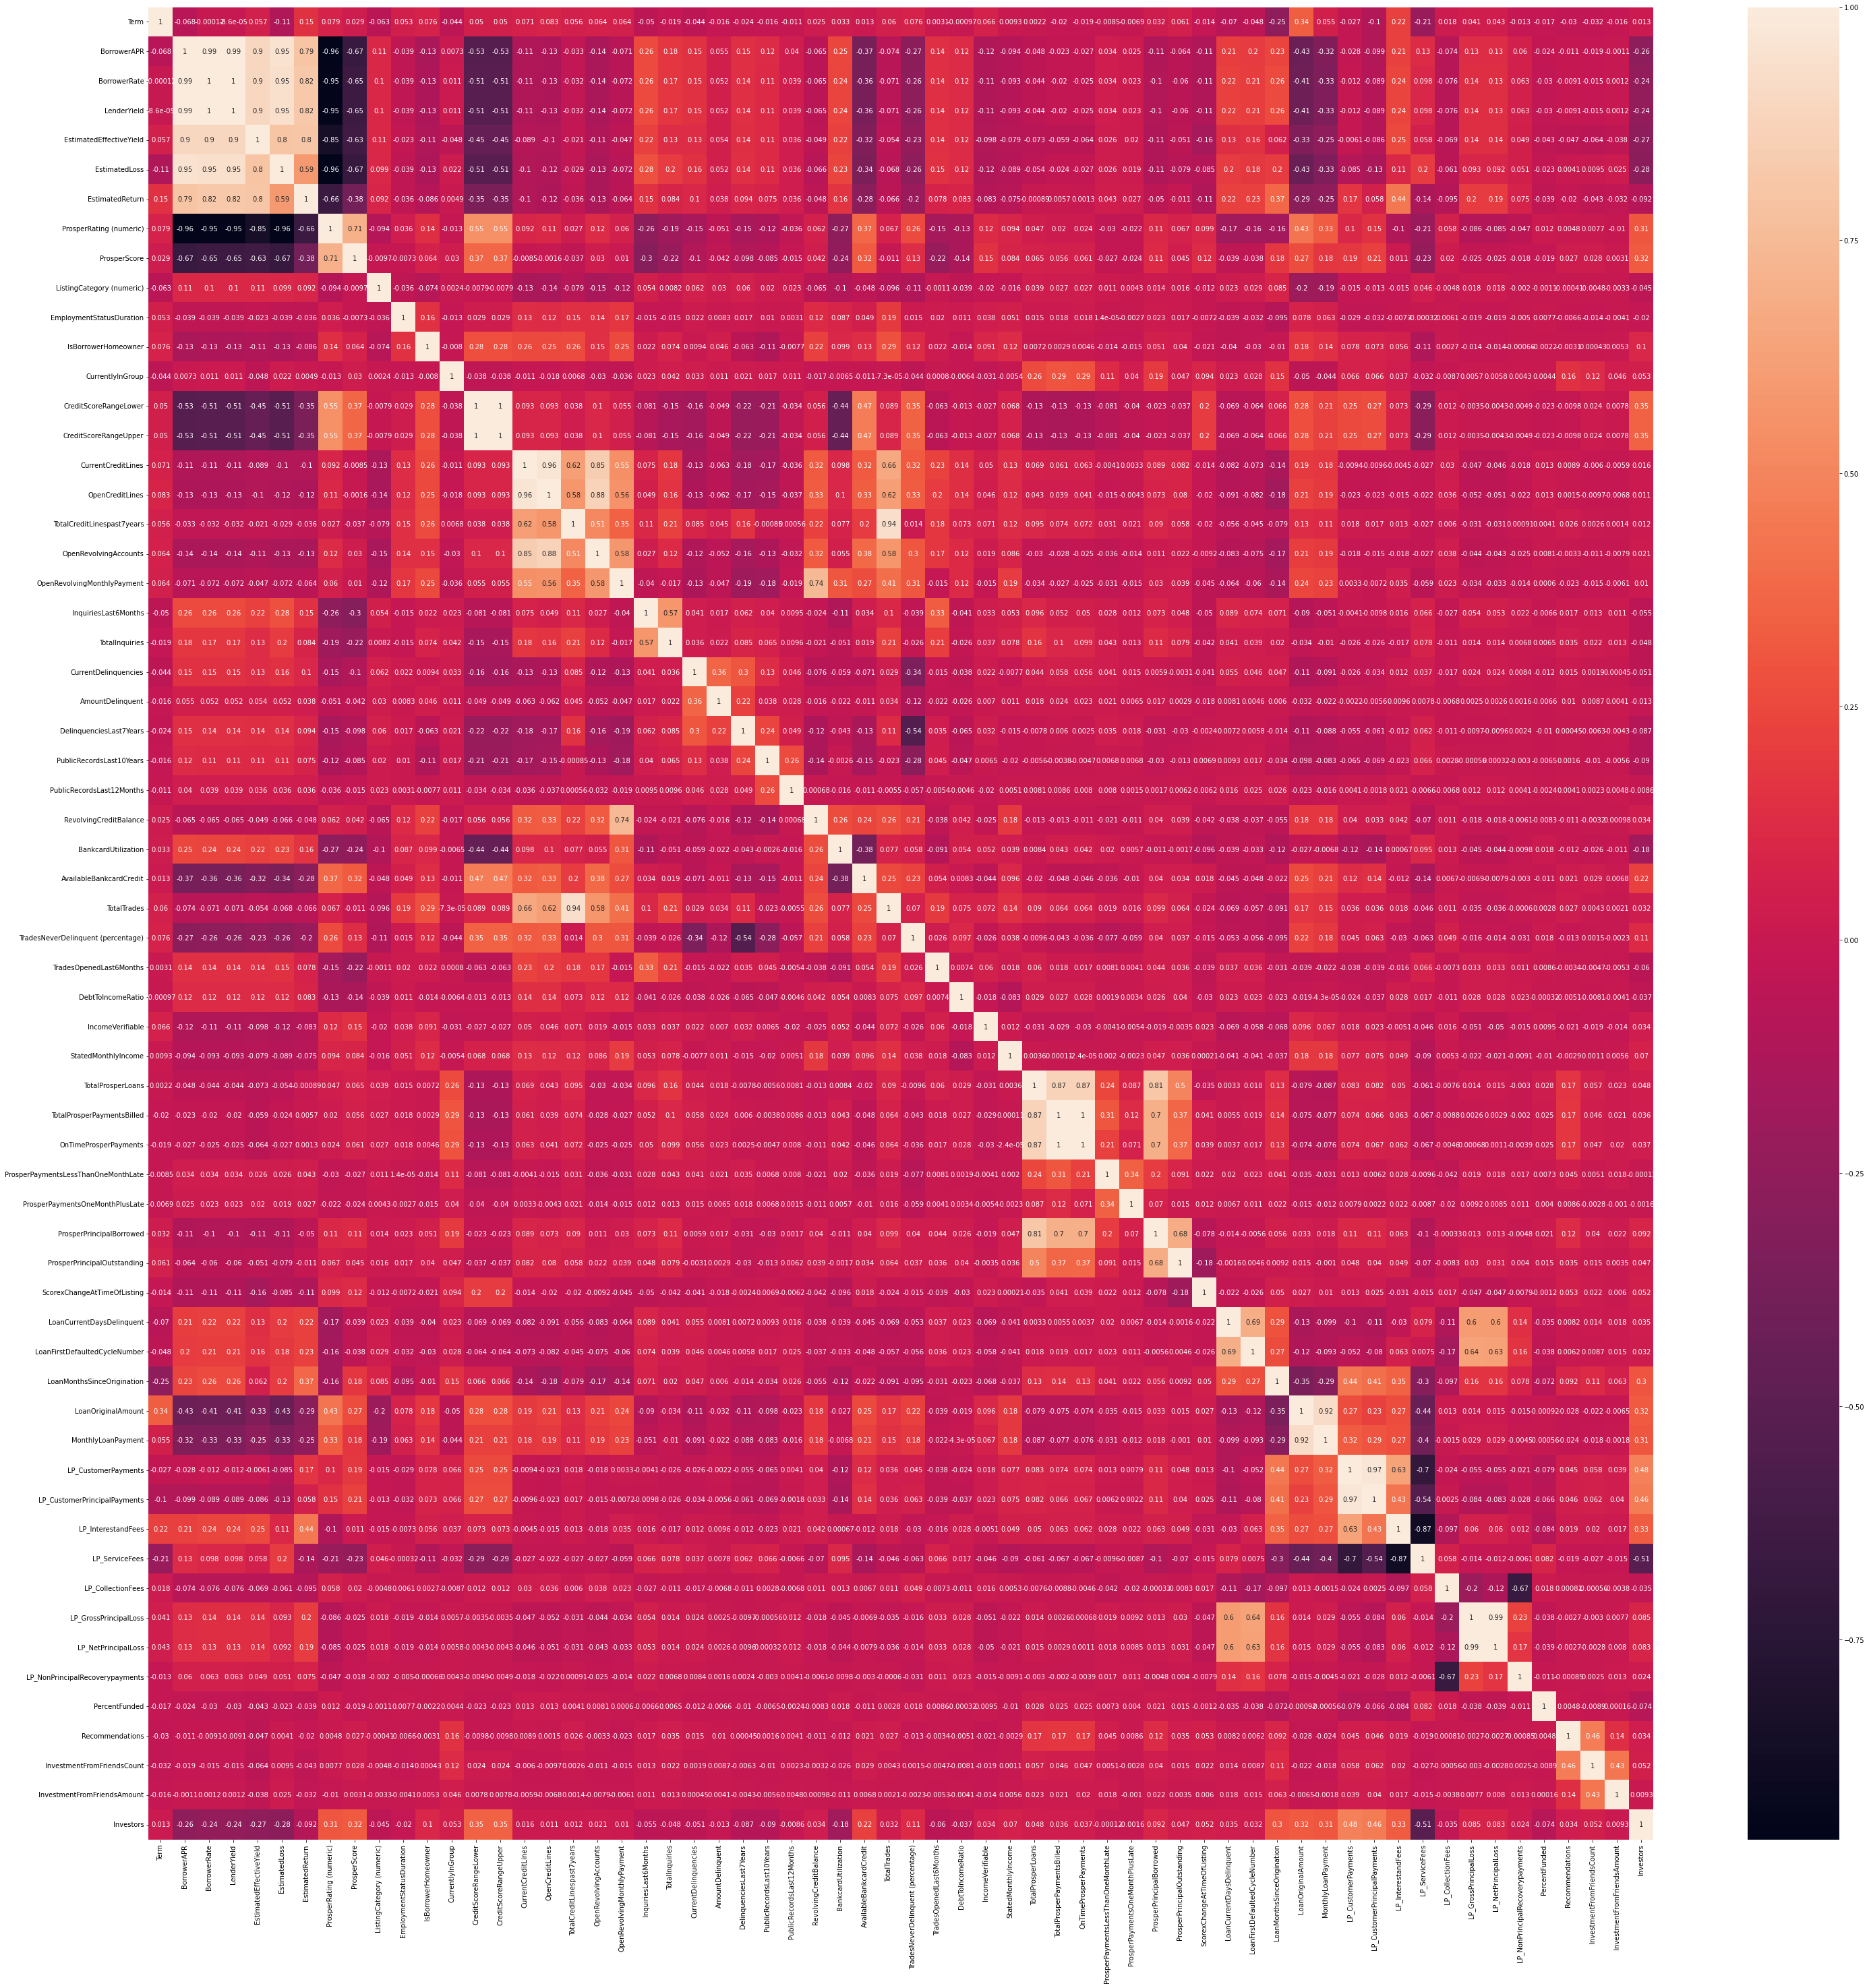

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(dataframe.corr(),cbar=True,annot=True)

##Shape & info of data remained

In [ ]:
dataframe.shape

(84853, 75)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingCreationDate                  84853 non-null  datetime64[ns]
 1   CreditGrade                          84853 non-null  object        
 2   Term                                 84853 non-null  int64         
 3   LoanStatus                           84853 non-null  object        
 4   ClosedDate                           84853 non-null  datetime64[ns]
 5   BorrowerAPR                          84853 non-null  float64       
 6   BorrowerRate                         84853 non-null  float64       
 7   LenderYield                          84853 non-null  float64       
 8   EstimatedEffectiveYield              84853 non-null  float64       
 9   EstimatedLoss                        84853 non-null  float64       
 10  Estimated

##Dropping Samples before 2008 (ListingCreationDate)

In [ ]:
dataframe['year'] = dataframe['ListingCreationDate'].dt.year
dataframe = dataframe.loc[dataframe.year > 2008, :]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingCreationDate                  84853 non-null  datetime64[ns]
 1   CreditGrade                          84853 non-null  object        
 2   Term                                 84853 non-null  int64         
 3   LoanStatus                           84853 non-null  object        
 4   ClosedDate                           84853 non-null  datetime64[ns]
 5   BorrowerAPR                          84853 non-null  float64       
 6   BorrowerRate                         84853 non-null  float64       
 7   LenderYield                          84853 non-null  float64       
 8   EstimatedEffectiveYield              84853 non-null  float64       
 9   EstimatedLoss                        84853 non-null  float64       
 10  Estimated

##Dropping Features with datatime type



*   ListingCreationDate
*   ClosedDate
* FirstRecordedCreditLine
* LoanOriginationDate
* DateCreditPulled
* year


In [ ]:
dataframe.drop('ListingCreationDate', axis=1, inplace=True)
dataframe.drop('ClosedDate', axis=1, inplace=True)
dataframe.drop('FirstRecordedCreditLine', axis=1, inplace=True)
dataframe.drop('LoanOriginationDate', axis=1, inplace=True)
dataframe.drop('DateCreditPulled', axis=1, inplace=True)
dataframe.drop('year', axis=1, inplace=True)

In [ ]:
dataframe.shape

(84853, 70)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CreditGrade                          84853 non-null  object 
 1   Term                                 84853 non-null  int64  
 2   LoanStatus                           84853 non-null  object 
 3   BorrowerAPR                          84853 non-null  float64
 4   BorrowerRate                         84853 non-null  float64
 5   LenderYield                          84853 non-null  float64
 6   EstimatedEffectiveYield              84853 non-null  float64
 7   EstimatedLoss                        84853 non-null  float64
 8   EstimatedReturn                      84853 non-null  float64
 9   ProsperRating (numeric)              84853 non-null  float64
 10  ProsperRating (Alpha)                84853 non-null  object 
 11  ProsperScore               

##Changing data with datatype bool to float


*   IncomeVerifiable
*   IsBorrowerHomeowner
*  CurrentlyInGroup



In [ ]:
dataframe['IncomeVerifiable'] = dataframe['IncomeVerifiable'].astype(float) 
dataframe['IsBorrowerHomeowner'] = dataframe['IsBorrowerHomeowner'].astype(float)  
dataframe['CurrentlyInGroup'] = dataframe['CurrentlyInGroup'].astype(float)                

In [ ]:
dataframe.shape

(84853, 70)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CreditGrade                          84853 non-null  object 
 1   Term                                 84853 non-null  int64  
 2   LoanStatus                           84853 non-null  object 
 3   BorrowerAPR                          84853 non-null  float64
 4   BorrowerRate                         84853 non-null  float64
 5   LenderYield                          84853 non-null  float64
 6   EstimatedEffectiveYield              84853 non-null  float64
 7   EstimatedLoss                        84853 non-null  float64
 8   EstimatedReturn                      84853 non-null  float64
 9   ProsperRating (numeric)              84853 non-null  float64
 10  ProsperRating (Alpha)                84853 non-null  object 
 11  ProsperScore               

##Removing duplicates if exist

In [ ]:
dataframe = dataframe.drop_duplicates()

In [ ]:
dataframe.shape

(84853, 70)

##Visulaization of features with datatype object 

we visulaize to see what to do in them either dropping them or converting them to int or float 

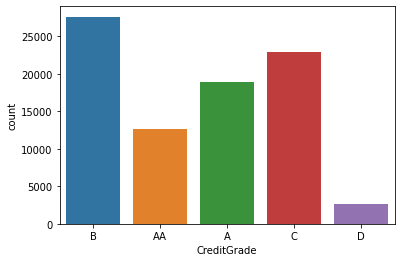

In [ ]:
sns.countplot(x=dataframe['CreditGrade'])

In [ ]:
dataframe.drop('CreditGrade', axis=1, inplace=True)

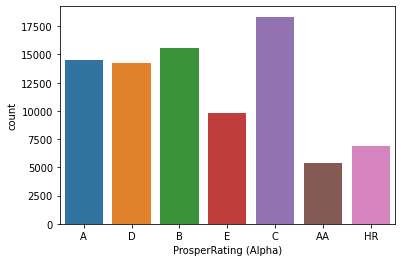

In [ ]:
sns.countplot(x=dataframe['ProsperRating (Alpha)'])

In [ ]:
dataframe.drop('ProsperRating (Alpha)', axis=1, inplace=True)

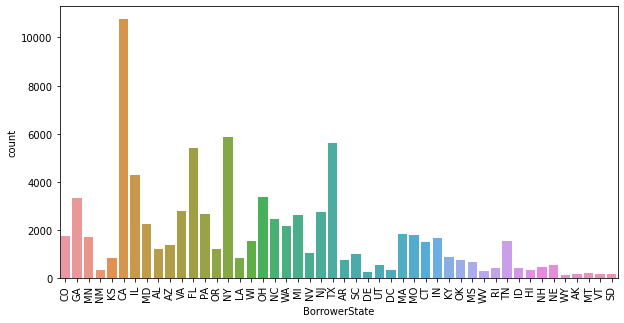

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataframe['BorrowerState'])
plt.xticks(rotation=90);

In [ ]:
dataframe.drop('BorrowerState', axis=1, inplace=True)

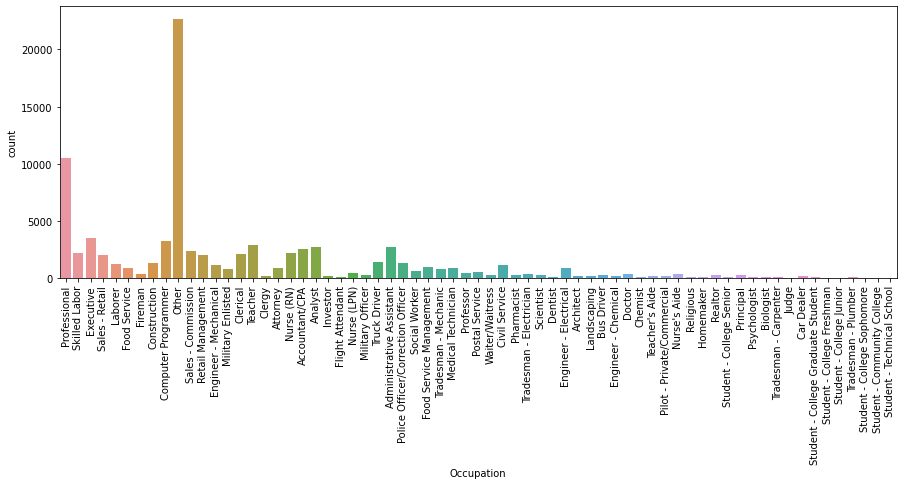

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x=dataframe['Occupation'])
plt.xticks(rotation=90);

In [ ]:
dataframe.drop('Occupation', axis=1, inplace=True)

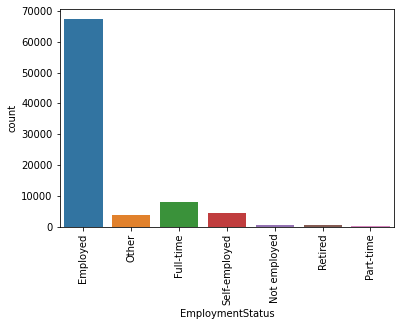

In [ ]:
sns.countplot(x=dataframe['EmploymentStatus'])
plt.xticks(rotation=90);

In [ ]:
Employment_mapping = {
           'Employed': 1,
           'Other': 0,
           'Full-time': 1,
           'Self-employed': 1,
           'Not employed': 0,
           'Retired': 0,
           'Part-time':1}

dataframe['EmploymentStatus'] = dataframe['EmploymentStatus'].map(Employment_mapping)

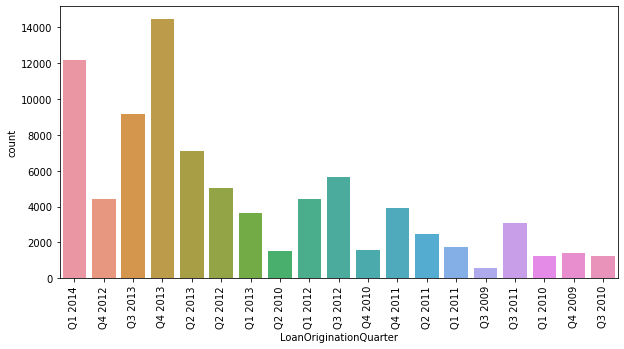

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=dataframe['LoanOriginationQuarter'])
plt.xticks(rotation=90);

In [ ]:
dataframe.drop('LoanOriginationQuarter', axis=1, inplace=True)

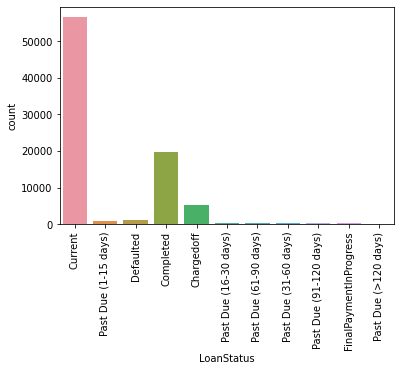

In [ ]:
sns.countplot(x=dataframe['LoanStatus'])
plt.xticks(rotation=90);

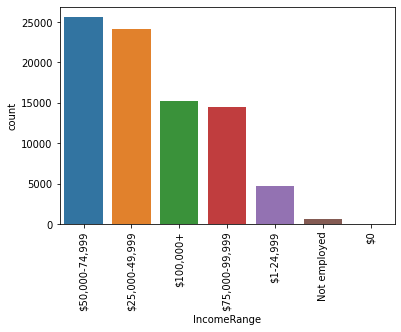

In [ ]:
sns.countplot(x=dataframe['IncomeRange'])
plt.xticks(rotation=90);

##Mapping

###IncomeRange

In [ ]:
dataframe['IncomeRange'].unique()

array(['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0'], dtype=object)

In [ ]:
IncomeRange_mapping = {
           '$50,000-74,999': 62500,
           '$25,000-49,999': 37500,
           '$100,000+': 100000,
            '$75,000-99,999': 87500,
            '$1-24,999': 12500,
            'Not employed': 0,
            '$0':0}

dataframe['IncomeRange'] = dataframe['IncomeRange'].map(IncomeRange_mapping)

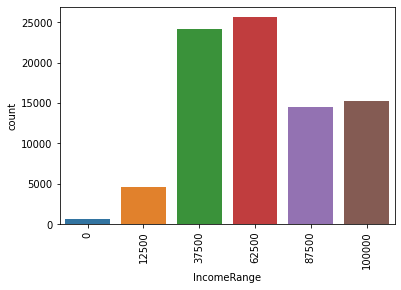

In [ ]:
sns.countplot(x=dataframe['IncomeRange'])
plt.xticks(rotation=90);

We will drop IncomeRange because StatedMonthlyIncome have the same meaning

In [ ]:
dataframe.drop('IncomeRange', inplace=True, axis=1)

###LoanStatus

dropping any sample with LoanStatus 'Current' as we cannot say this is completed or not

In [ ]:
dataframe = dataframe.loc[dataframe.LoanStatus != 'Current', :]

In [ ]:
dataframe.shape

(28277, 64)

In [ ]:
dataframe['LoanStatus'].unique()

array(['Past Due (1-15 days)', 'Defaulted', 'Completed', 'Chargedoff',
       'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [ ]:
Status_mapping = {
           'Completed': 1,
           'Past Due (1-15 days)': 0,
           'Past Due (16-30 days)': 0,
           'Past Due (61-90 days)': 0,
           'Past Due (91-120 days)': 0,
           'Past Due (31-60 days)': 0,
           'Past Due (>120 days)':0,
            'Defaulted': 0,
            'Chargedoff': 0,
            'FinalPaymentInProgress': 0}

dataframe['LoanStatus'] = dataframe['LoanStatus'].map(Status_mapping)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


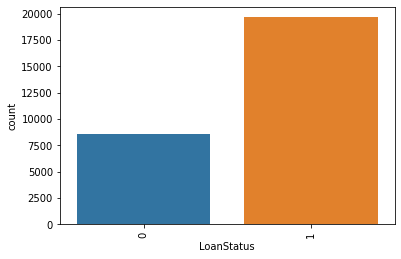

In [ ]:
sns.countplot(x=dataframe['LoanStatus'])
plt.xticks(rotation=90);

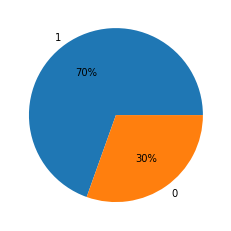

In [ ]:
df = dataframe['LoanStatus'].value_counts()
plt.pie(df, labels=df.index, autopct="%.0f%%");

##Columns that will be dropped bec. are not important or there is anther column with the same meaning or 2 high corr. features by leaving only one feature

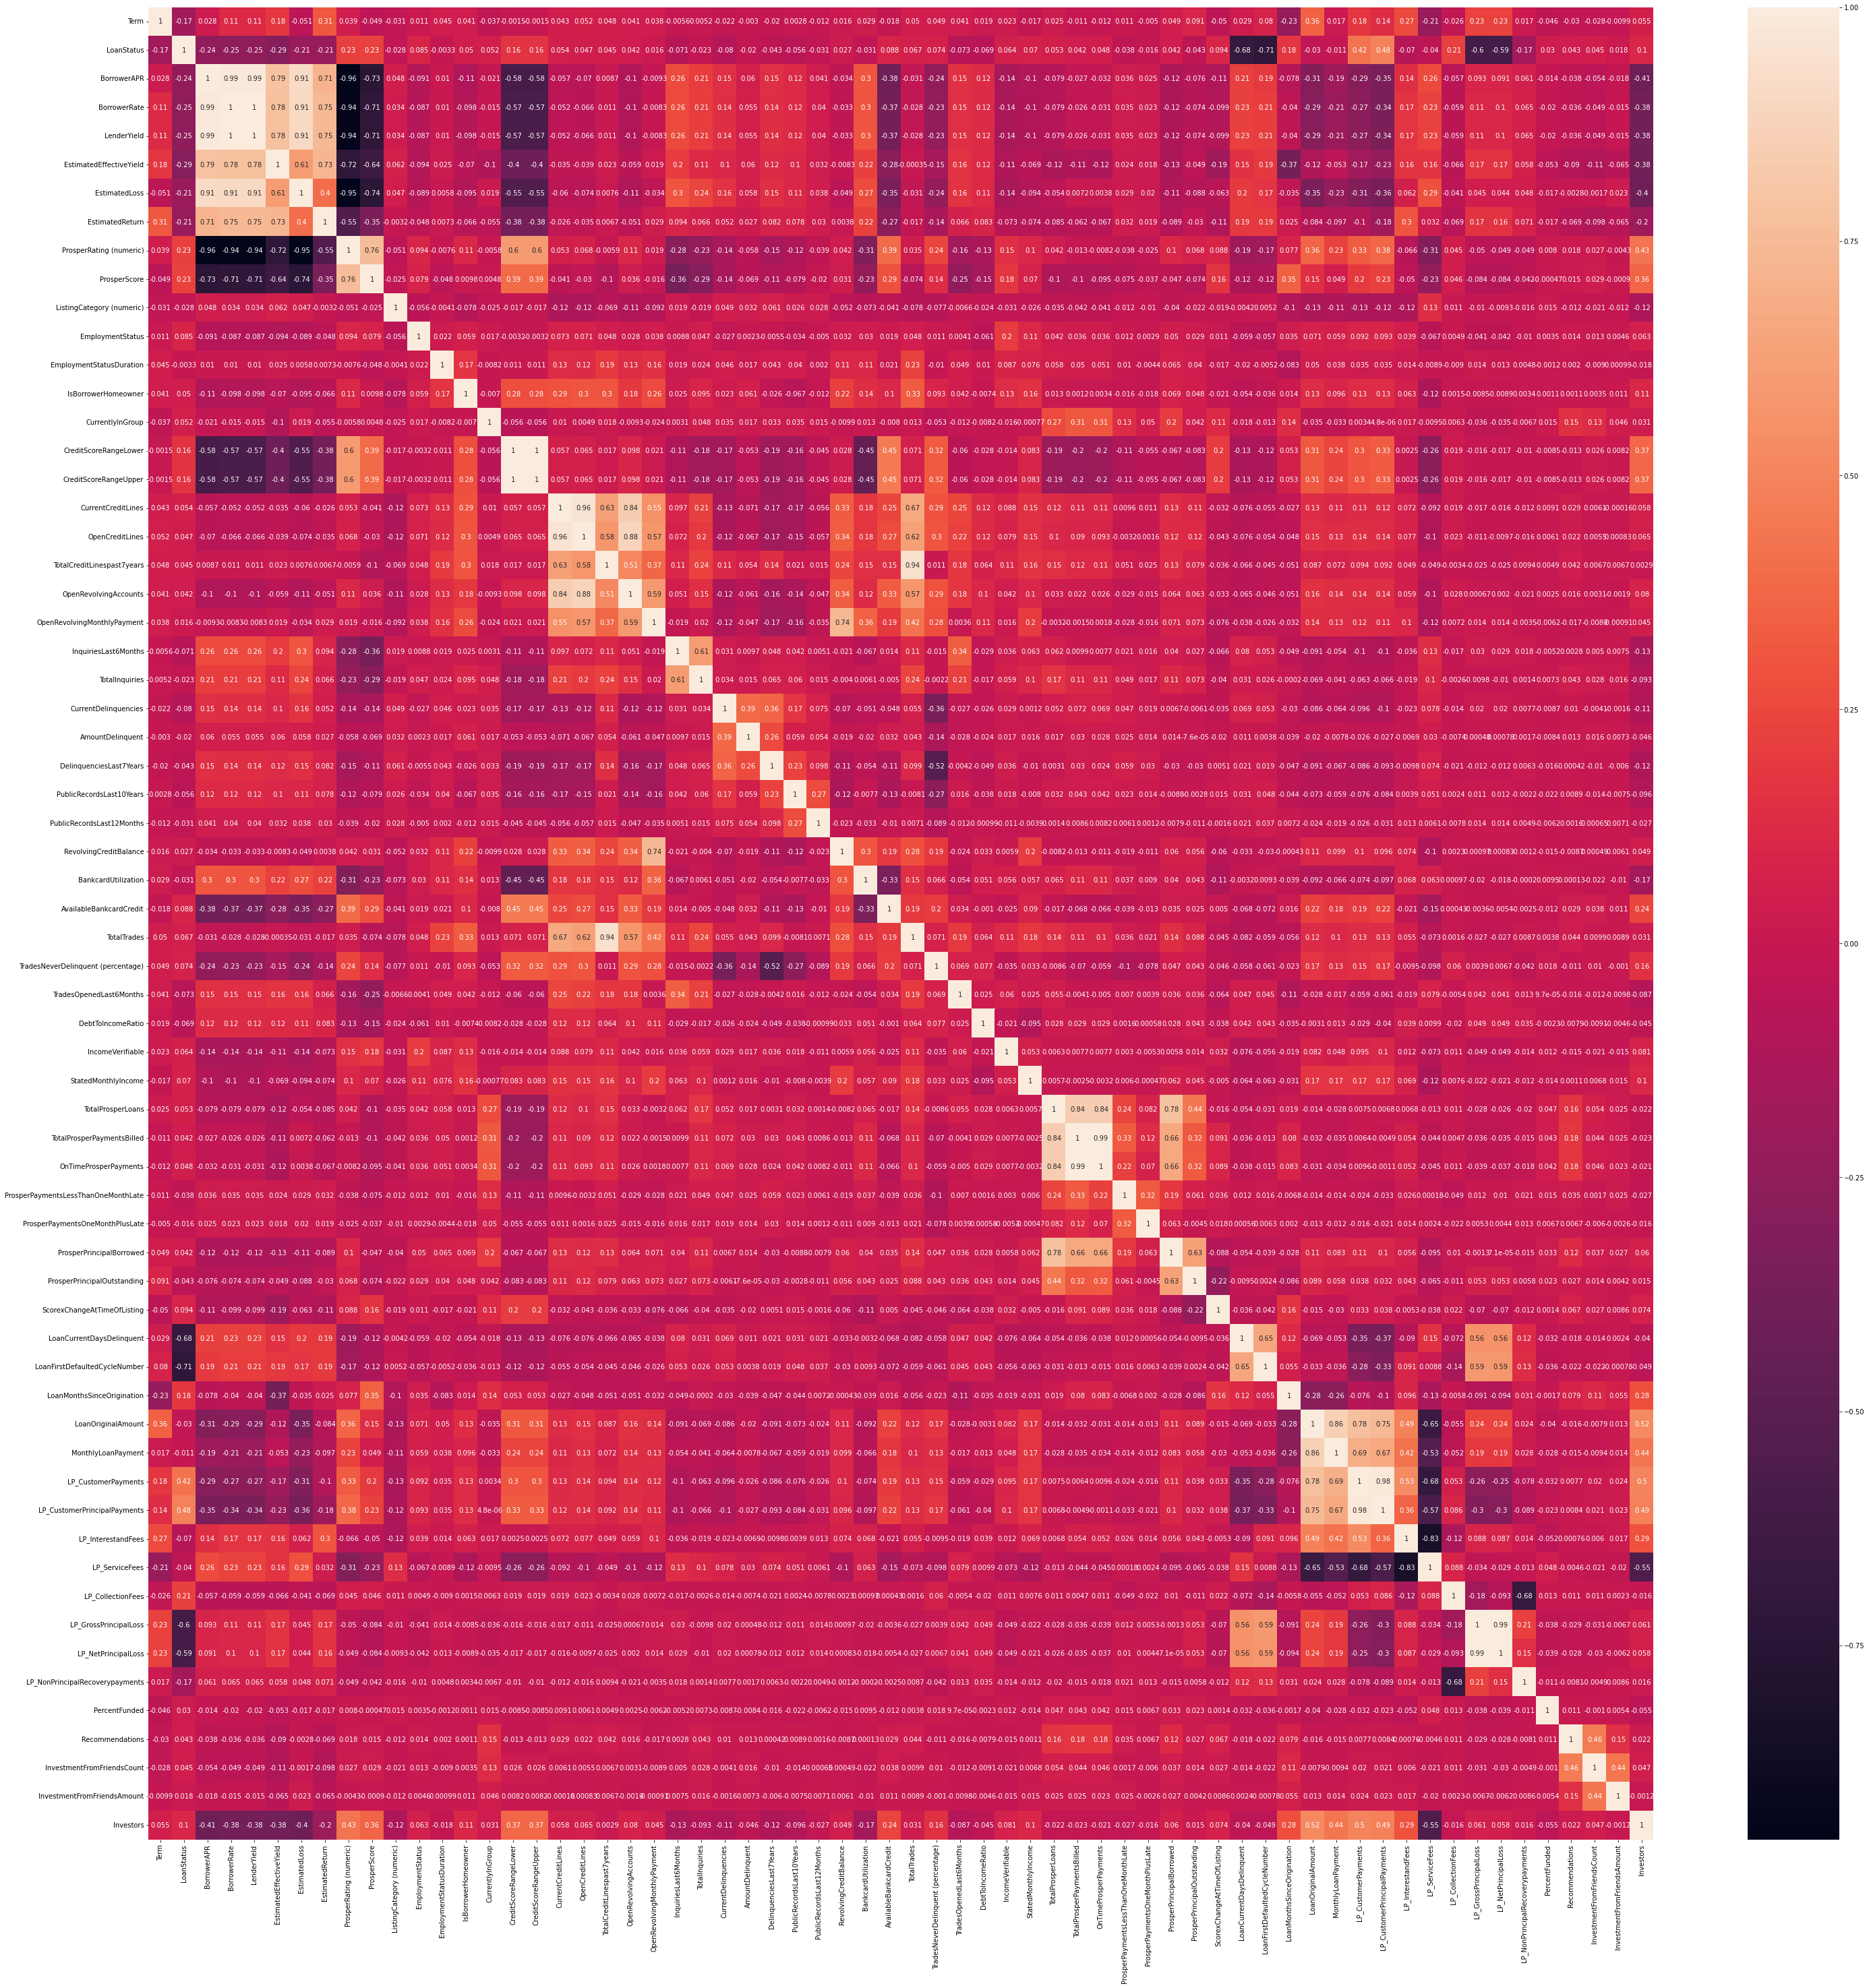

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(dataframe.corr(),cbar=True,annot=True)

In [ ]:
dataframe.shape

(28277, 64)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28277 entries, 12 to 113935
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 28277 non-null  int64  
 1   LoanStatus                           28277 non-null  int64  
 2   BorrowerAPR                          28277 non-null  float64
 3   BorrowerRate                         28277 non-null  float64
 4   LenderYield                          28277 non-null  float64
 5   EstimatedEffectiveYield              28277 non-null  float64
 6   EstimatedLoss                        28277 non-null  float64
 7   EstimatedReturn                      28277 non-null  float64
 8   ProsperRating (numeric)              28277 non-null  float64
 9   ProsperScore                         28277 non-null  float64
 10  ListingCategory (numeric)            28277 non-null  int64  
 11  EmploymentStatus          

In [ ]:
dataframe.drop('EmploymentStatus', axis=1, inplace=True)
dataframe.drop('Investors', axis=1, inplace=True)
dataframe.drop('InvestmentFromFriendsAmount', axis=1, inplace=True)
dataframe.drop('InvestmentFromFriendsCount', axis=1, inplace=True)
dataframe.drop('Term',axis=1,inplace=True)
dataframe.drop('ListingCategory (numeric)',axis=1,inplace=True)
dataframe.drop('EmploymentStatusDuration',axis=1,inplace=True)
dataframe.drop('IsBorrowerHomeowner',axis=1,inplace=True)
dataframe.drop('CurrentlyInGroup',axis=1,inplace=True)
dataframe.drop('CurrentCreditLines', axis=1, inplace=True)
dataframe.drop('OpenCreditLines', axis=1, inplace=True)
dataframe.drop('TotalCreditLinespast7years', axis=1, inplace=True)
dataframe.drop('OpenRevolvingAccounts', axis=1, inplace=True)
dataframe.drop('OpenRevolvingMonthlyPayment', axis=1, inplace=True)
dataframe.drop('InquiriesLast6Months', axis=1, inplace=True)
dataframe.drop('TotalInquiries', axis=1, inplace=True)
dataframe.drop('CurrentDelinquencies', axis=1, inplace=True)
dataframe.drop('AmountDelinquent', axis=1, inplace=True)
dataframe.drop('DelinquenciesLast7Years', axis=1, inplace=True)
dataframe.drop('PublicRecordsLast12Months', axis=1, inplace=True)
dataframe.drop('PublicRecordsLast10Years', axis=1, inplace=True)
dataframe.drop('RevolvingCreditBalance', axis=1, inplace=True)
dataframe.drop('TotalProsperPaymentsBilled', axis=1, inplace=True)
dataframe.drop('TotalProsperLoans', axis=1, inplace=True)
dataframe.drop('LP_CustomerPayments', axis=1, inplace=True)
dataframe.drop('LP_NetPrincipalLoss', axis=1, inplace=True)
dataframe.drop('EstimatedEffectiveYield', axis=1, inplace=True)
dataframe.drop('EstimatedLoss', axis=1, inplace=True)
dataframe.drop('LoanCurrentDaysDelinquent', axis=1, inplace=True)
dataframe.drop('LP_InterestandFees', axis=1, inplace=True)
dataframe.drop('LoanFirstDefaultedCycleNumber', axis=1, inplace=True)
dataframe.drop('Recommendations', axis=1, inplace=True)
dataframe.drop('PercentFunded', axis=1, inplace=True)

After dropping features

In [ ]:
dataframe.shape

(28277, 31)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28277 entries, 12 to 113935
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LoanStatus                           28277 non-null  int64  
 1   BorrowerAPR                          28277 non-null  float64
 2   BorrowerRate                         28277 non-null  float64
 3   LenderYield                          28277 non-null  float64
 4   EstimatedReturn                      28277 non-null  float64
 5   ProsperRating (numeric)              28277 non-null  float64
 6   ProsperScore                         28277 non-null  float64
 7   CreditScoreRangeLower                28277 non-null  float64
 8   CreditScoreRangeUpper                28277 non-null  float64
 9   BankcardUtilization                  28277 non-null  float64
 10  AvailableBankcardCredit              28277 non-null  float64
 11  TotalTrades               

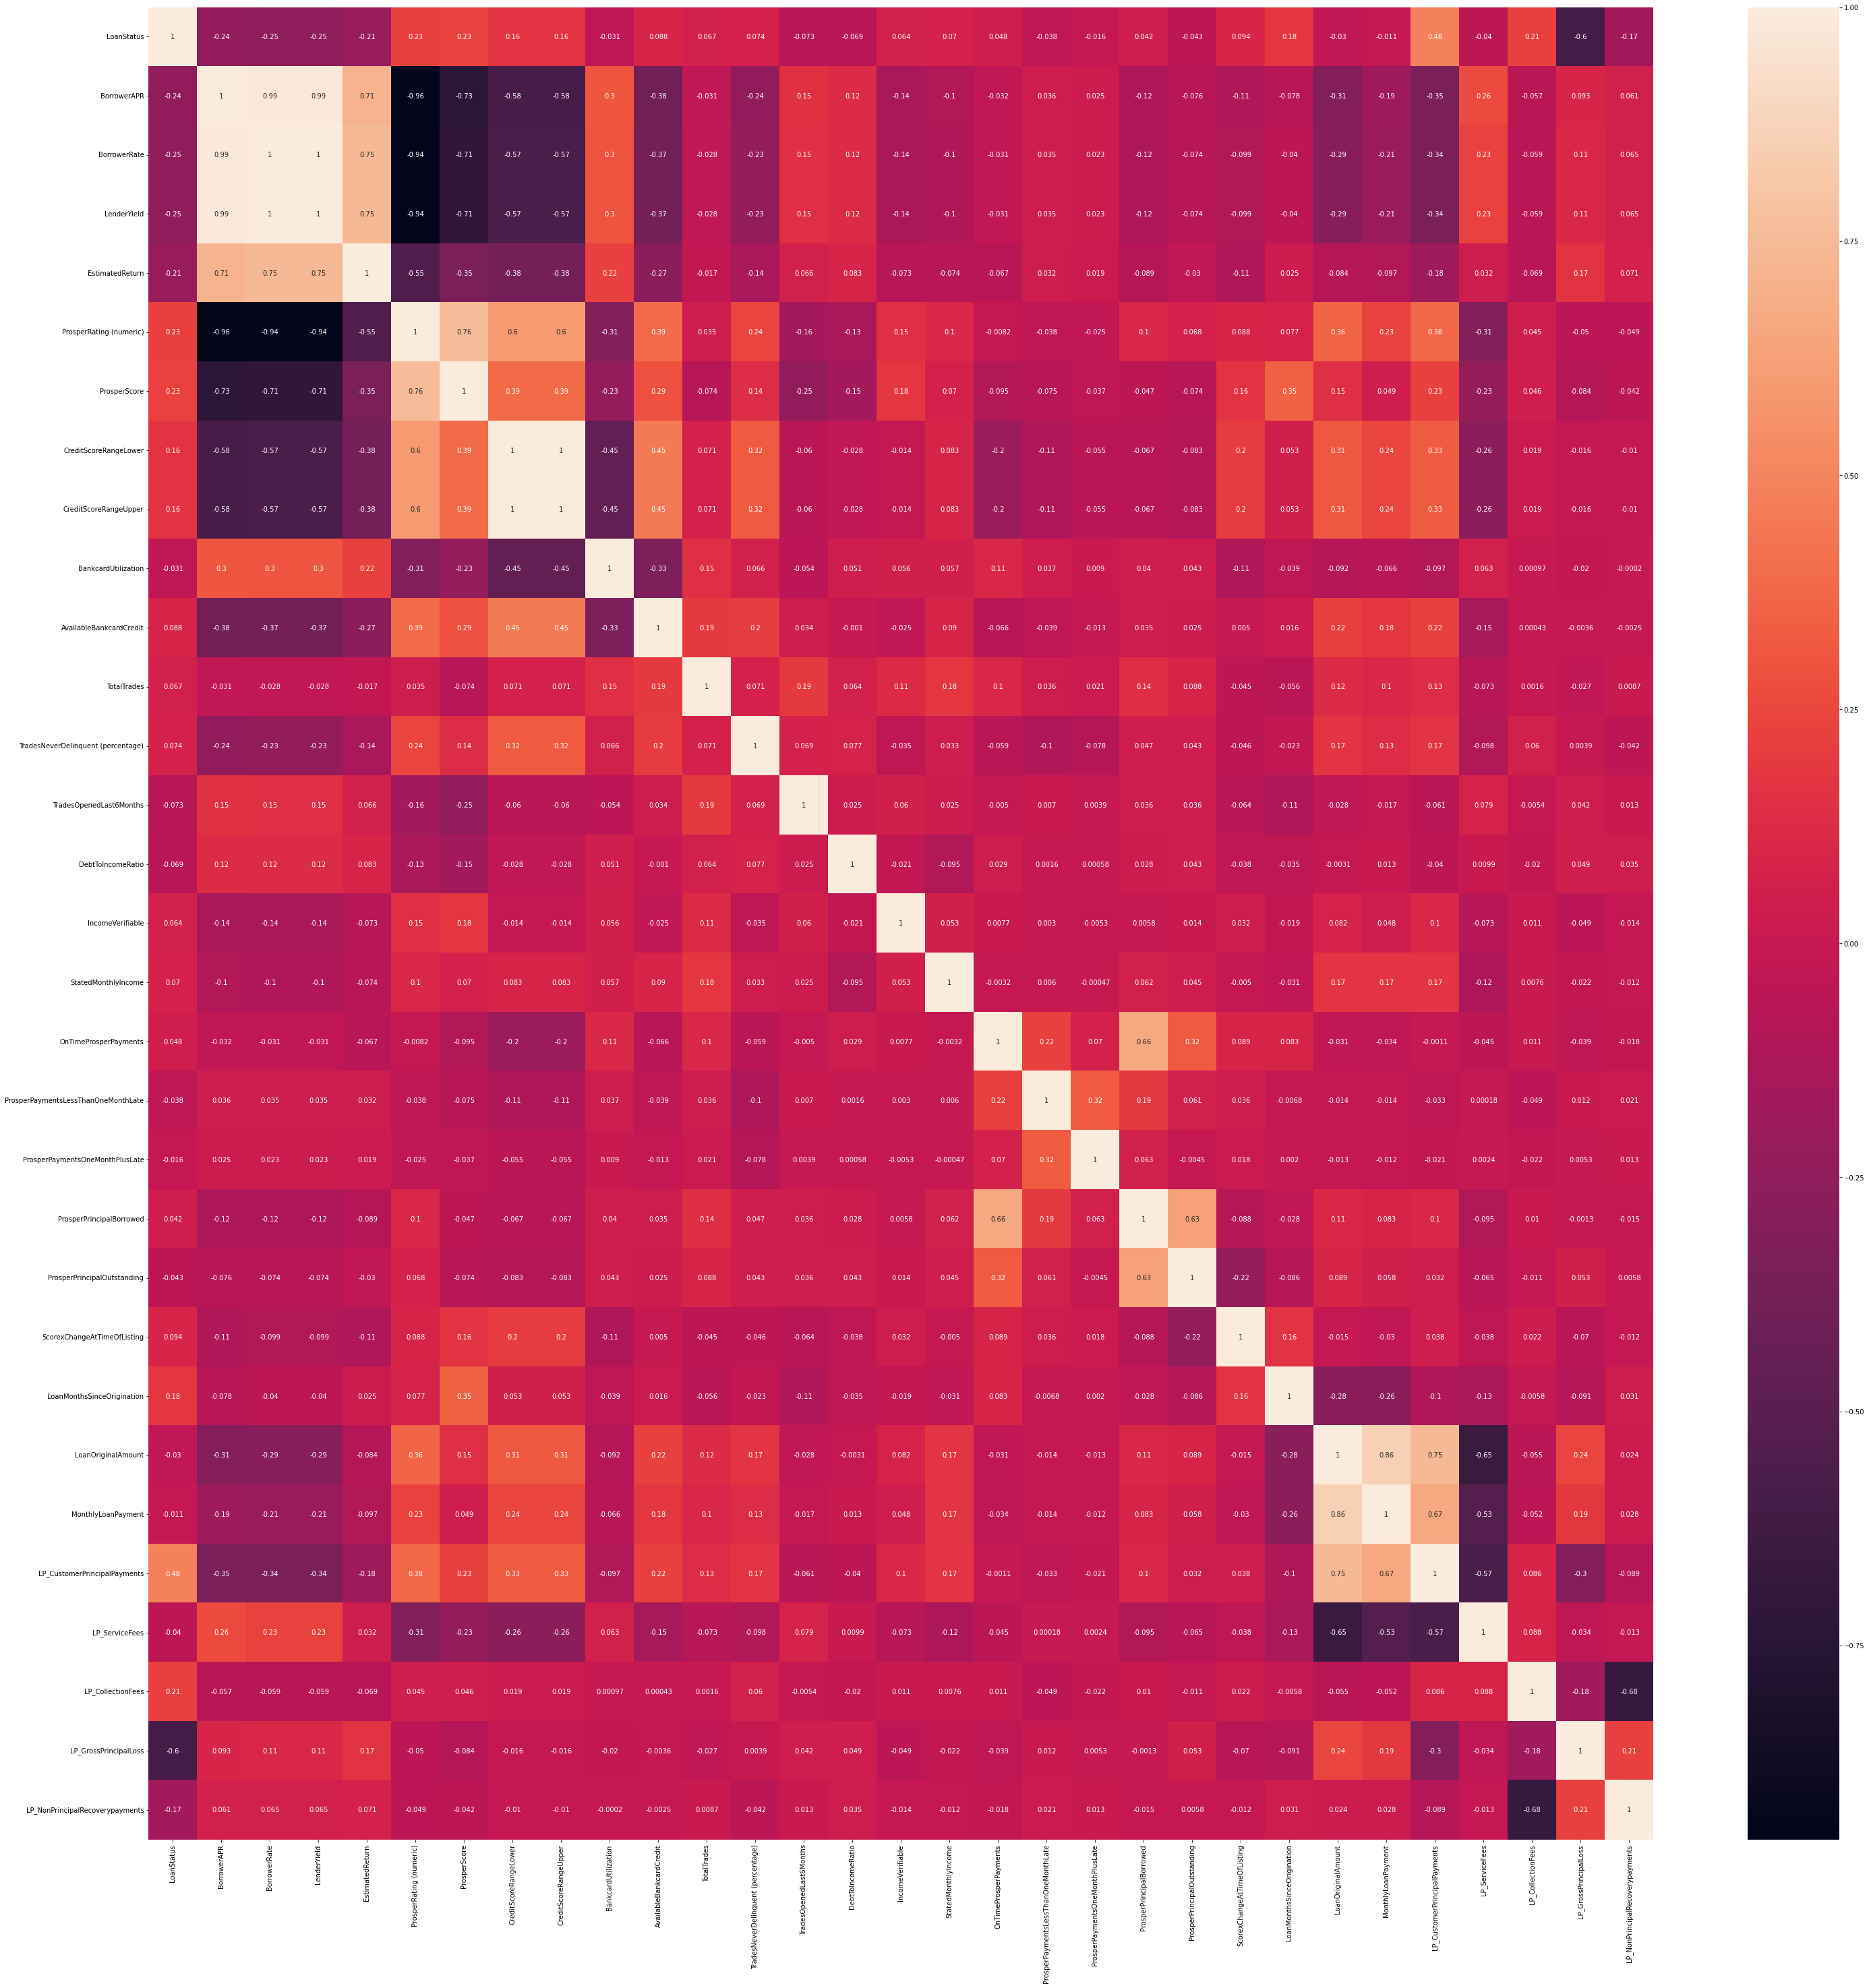

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(dataframe.corr(),cbar=True,annot=True)

##Handling outliners

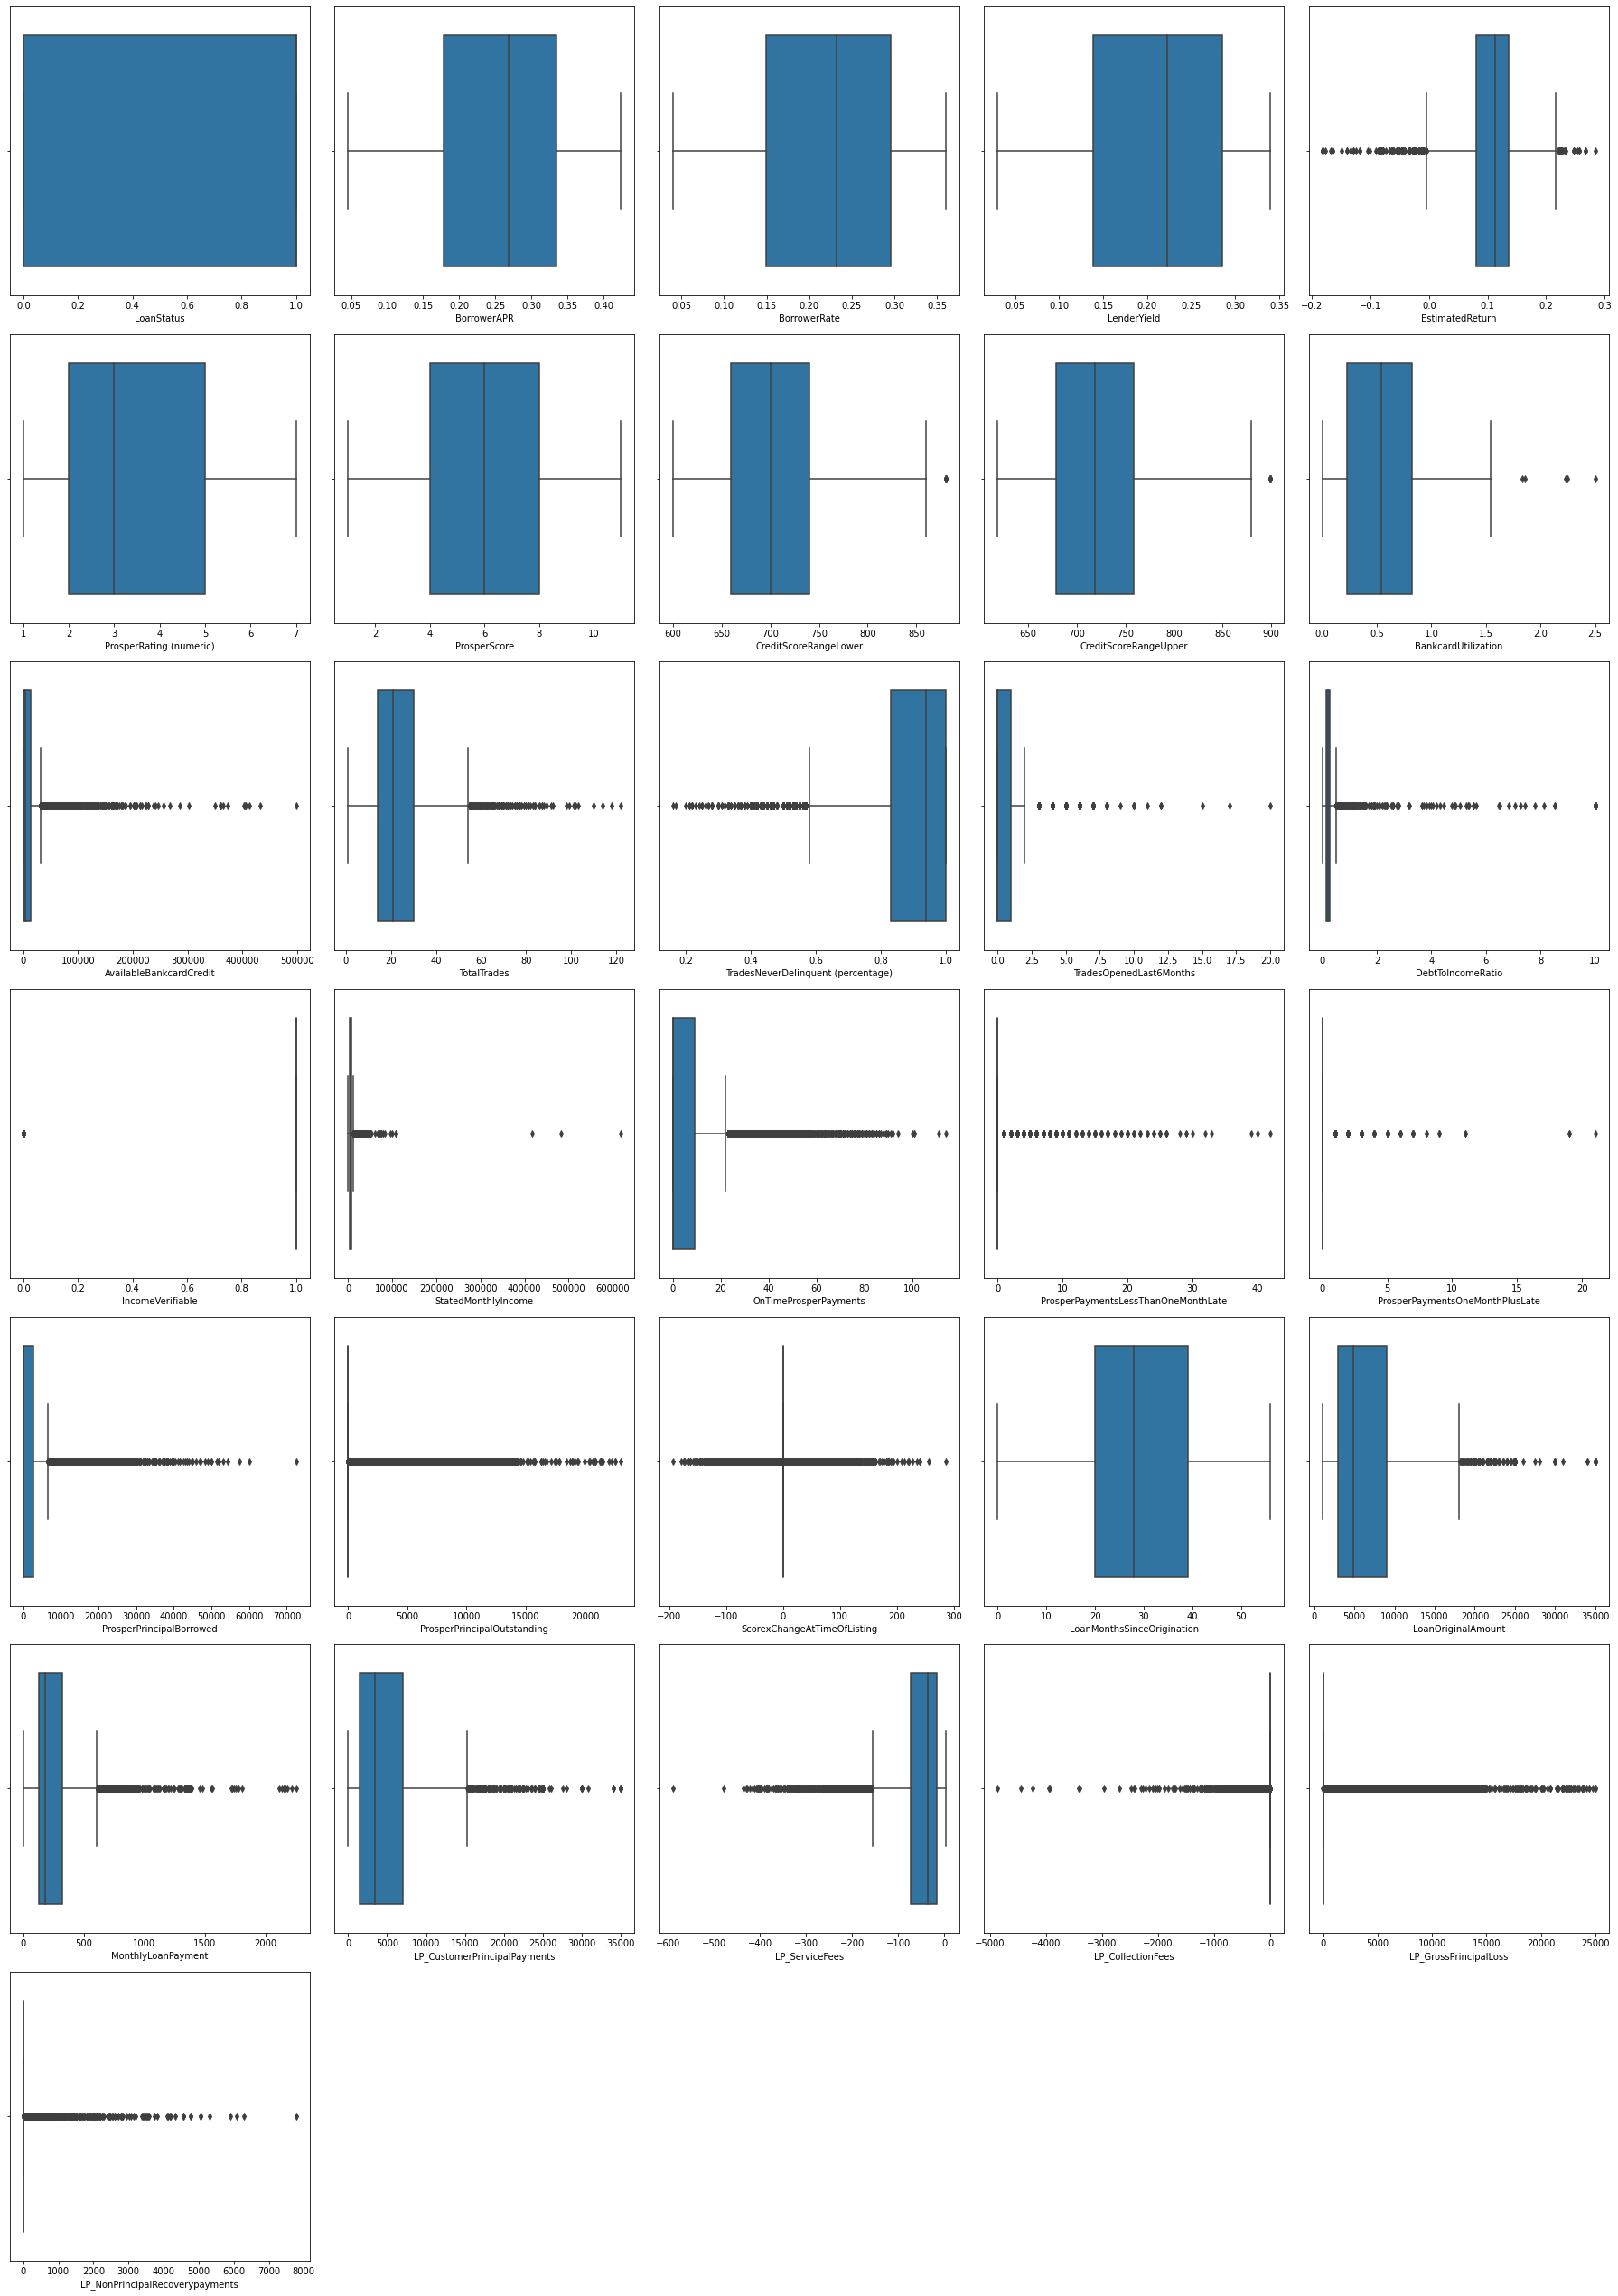

In [ ]:
cols = 5
rows = 8
num_cols = dataframe.columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = dataframe[col], ax = ax,)
fig.tight_layout() 
plt.show()

In [ ]:
for feature in dataframe.columns:
  Q1=dataframe[feature].quantile(0.25)
  Q3=dataframe[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_extrem=Q1-1.5*IQR
  upper_extrem=Q3+1.5*IQR
  mean=dataframe[feature].mean()
  out1=dataframe[(dataframe[feature]<lower_extrem)].values
  out2=dataframe[(dataframe[feature]>upper_extrem)].values

  dataframe[feature].replace(out1,mean,inplace=True)
  dataframe[feature].replace(out2,mean,inplace=True)

###After removing outliners

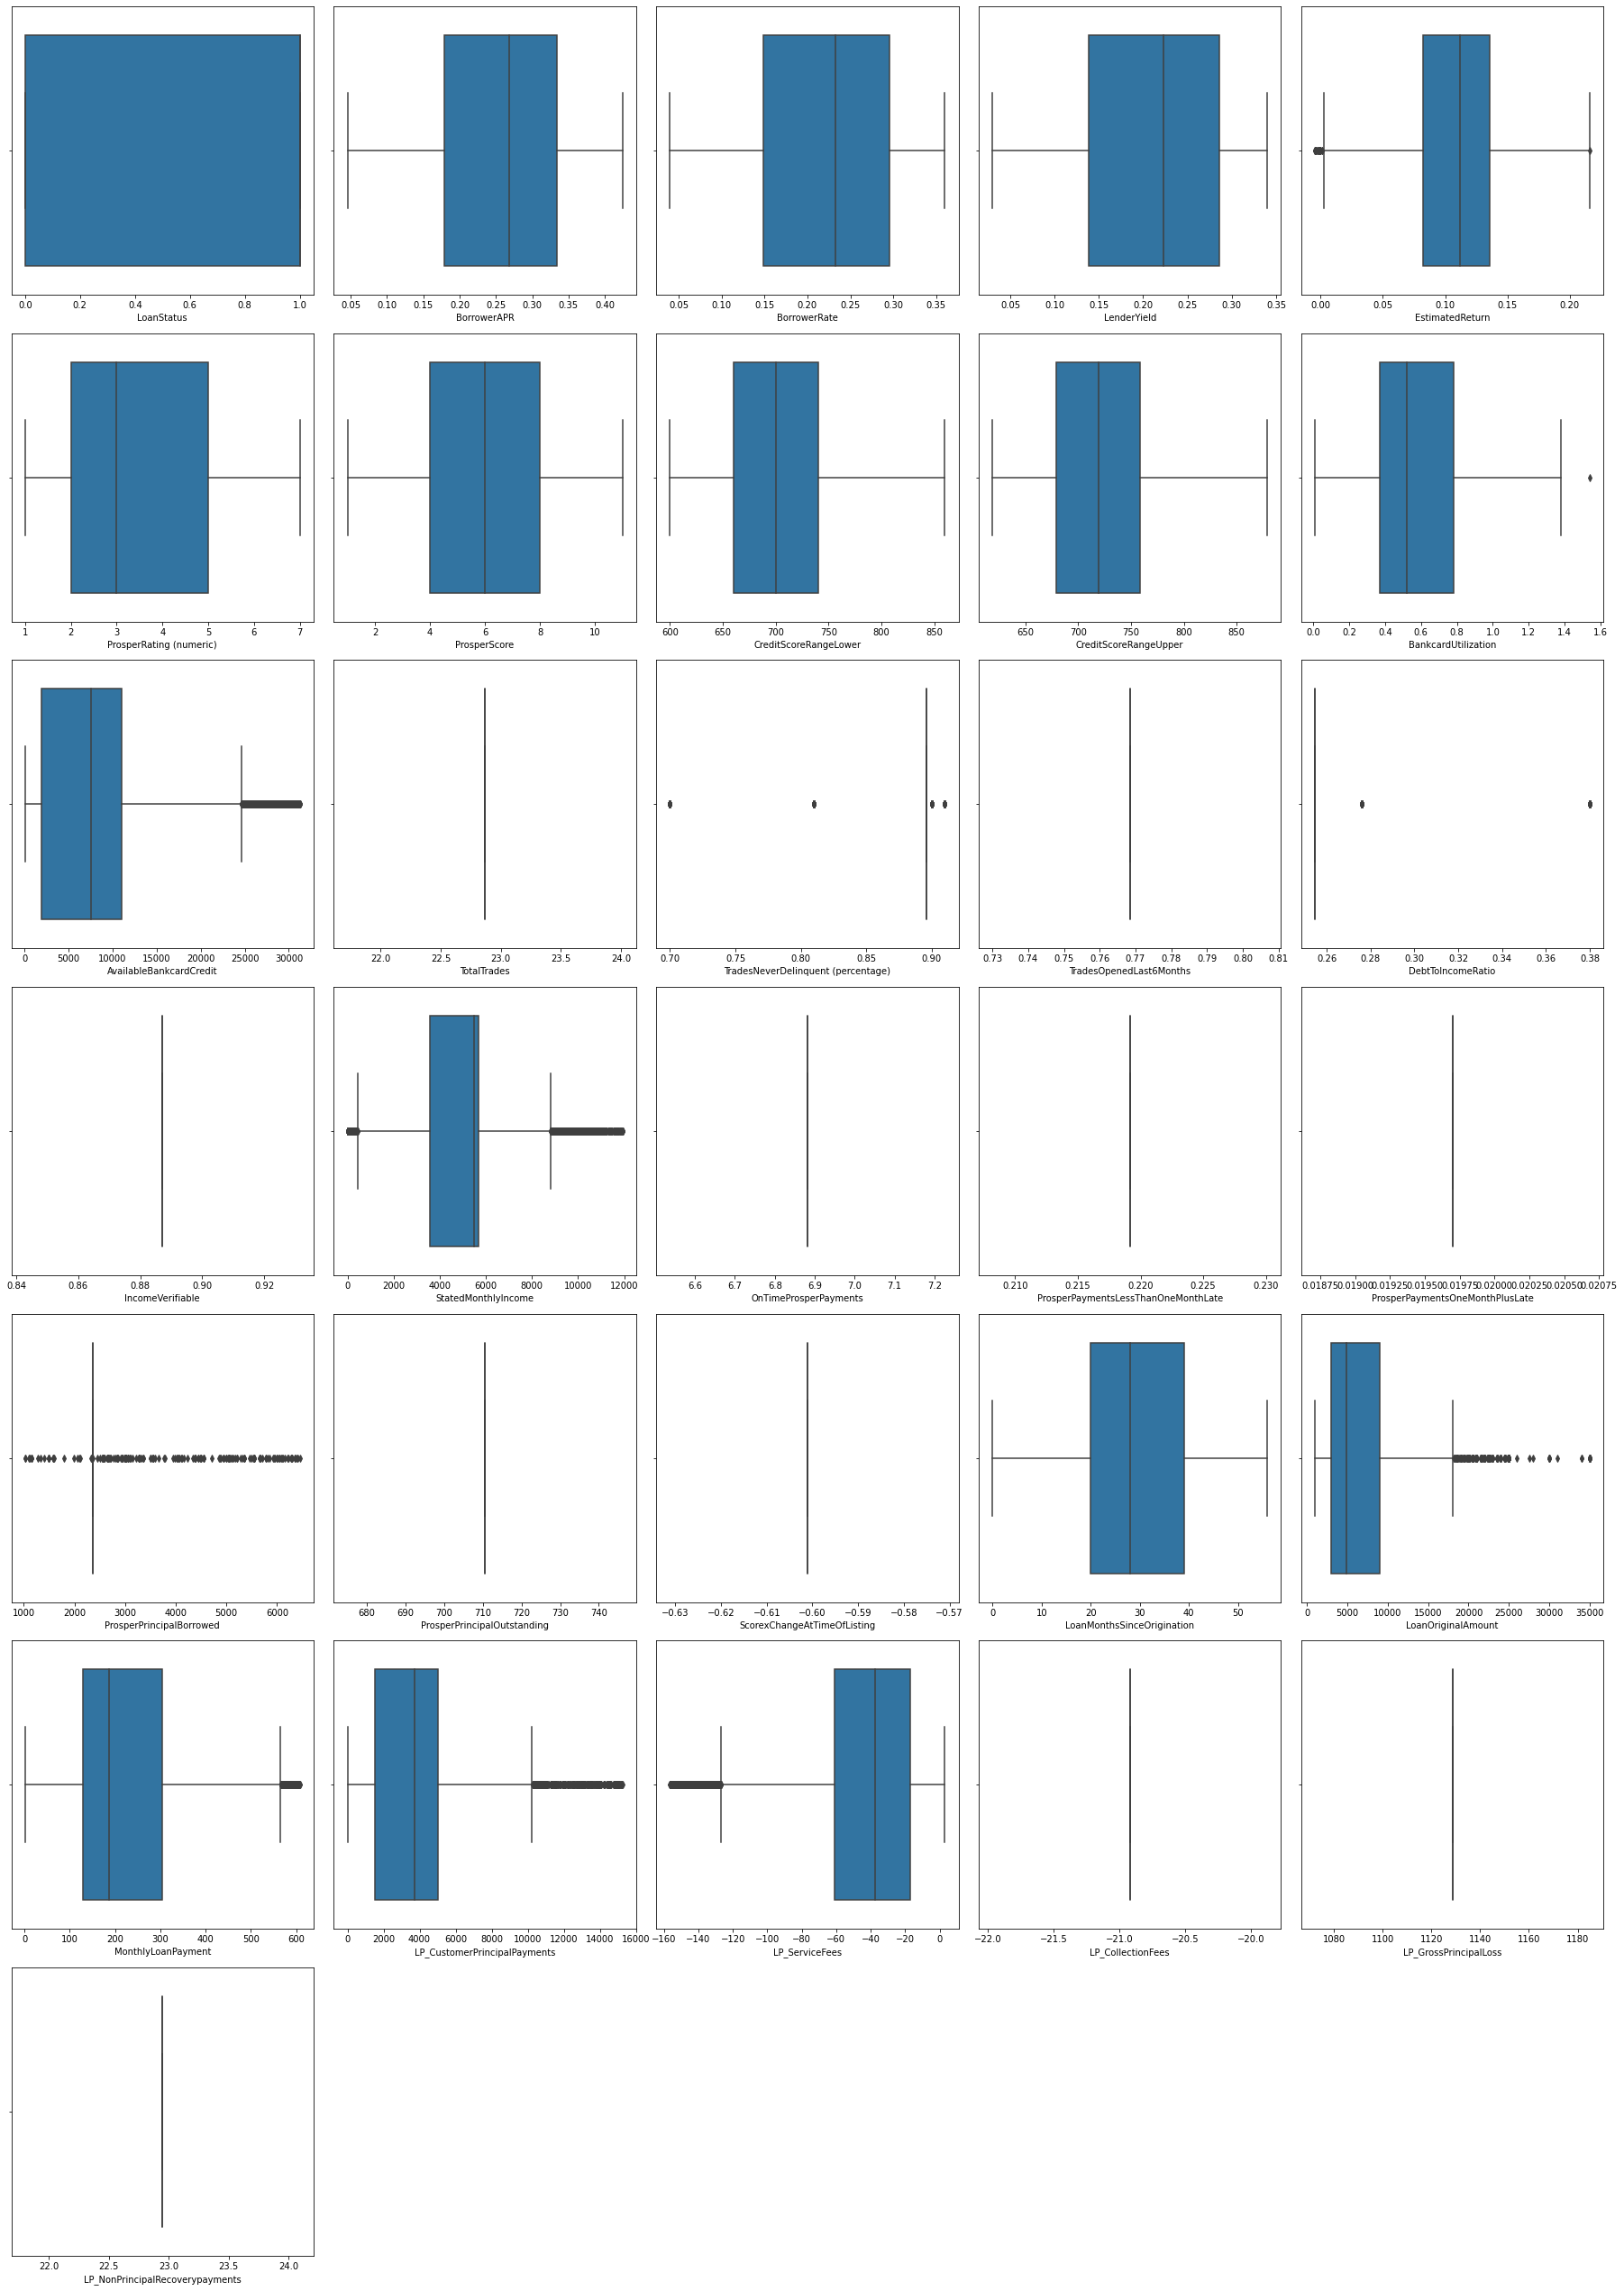

In [ ]:
cols = 5
rows = 8
num_cols = dataframe.columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    ax=fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x = dataframe[col], ax = ax,)
fig.tight_layout() 
plt.show()

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28277 entries, 12 to 113935
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   LoanStatus                           28277 non-null  int64  
 1   BorrowerAPR                          28277 non-null  float64
 2   BorrowerRate                         28277 non-null  float64
 3   LenderYield                          28277 non-null  float64
 4   EstimatedReturn                      28277 non-null  float64
 5   ProsperRating (numeric)              28277 non-null  float64
 6   ProsperScore                         28277 non-null  float64
 7   CreditScoreRangeLower                28277 non-null  float64
 8   CreditScoreRangeUpper                28277 non-null  float64
 9   BankcardUtilization                  28277 non-null  float64
 10  AvailableBankcardCredit              28277 non-null  float64
 11  TotalTrades               

dropped this columns after looking to the graph of each feature after removing the outliners

In [ ]:
dataframe.drop('LP_NonPrincipalRecoverypayments', axis=1, inplace=True)
dataframe.drop('LP_GrossPrincipalLoss', axis=1, inplace=True)
dataframe.drop('LP_CollectionFees', axis=1, inplace=True)
dataframe.drop('ScorexChangeAtTimeOfListing', axis=1, inplace=True)
dataframe.drop('ProsperPrincipalOutstanding', axis=1, inplace=True)
dataframe.drop('ProsperPaymentsLessThanOneMonthLate', axis=1, inplace=True)
dataframe.drop('ProsperPrincipalBorrowed', axis=1, inplace=True)
dataframe.drop('OnTimeProsperPayments', axis=1, inplace=True)
dataframe.drop('IncomeVerifiable', axis=1, inplace=True)
dataframe.drop('DebtToIncomeRatio', axis=1, inplace=True)
dataframe.drop('TradesOpenedLast6Months', axis=1, inplace=True)
dataframe.drop('TradesNeverDelinquent (percentage)', axis=1, inplace=True)
dataframe.drop('TotalTrades', axis=1, inplace=True)

#Making multiple copies of the dataframe

to be used in logistic regression model

In [ ]:
logistic_df = dataframe.copy()

to be used in neural network model

In [ ]:
neural_df = dataframe.copy()

to be used in naive bayes

In [ ]:
bayes_df = dataframe.copy()

to be used in Decision Trees

In [ ]:
trees_df = dataframe.copy()

#Logistic Regression Model

##Data , Labels

In [ ]:
labels = logistic_df['LoanStatus']

In [ ]:
logistic_df.drop('LoanStatus', axis=1, inplace=True)

In [ ]:
logistic_df.shape

(28277, 17)

##Splitting

In [ ]:
train_data,test_data, train_labels, test_labels = train_test_split(logistic_df, labels, train_size=0.8, stratify=labels,shuffle=True)

##Feature scaling

In [ ]:
min_max_scaler_lr = preprocessing.MinMaxScaler()
normalized_train_data = min_max_scaler_lr.fit_transform(train_data)
normalized_test_data = min_max_scaler_lr.fit_transform(test_data)

##Model (data balanced)

undersampling (we will lose 40% of the data by doing undersampling but i am not sure is this the optimal solution or not)

In [ ]:
under_sam = RandomUnderSampler(random_state=0)
train_data_resampled,train_labels_resampled=under_sam.fit_resample(normalized_train_data,train_labels)
test_data_resampled,test_labels_resampled=under_sam.fit_resample(normalized_test_data,test_labels)

Checking that the data is balanced now

In [ ]:
print(np.unique(np.array(train_labels_resampled),return_counts=True))

(array([0, 1]), array([6890, 6890]))


In [ ]:
print(np.unique(np.array(test_labels_resampled),return_counts=True))

(array([0, 1]), array([1723, 1723]))


In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_data_resampled,train_labels_resampled)
pred_labels=logreg.predict(test_data_resampled)

##Accuracy Results

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_labels_resampled, pred_labels)*100)

Accuracy: 91.35229251305861


In [ ]:
print(metrics.classification_report(test_labels_resampled, pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1723
           1       0.89      0.94      0.92      1723

    accuracy                           0.91      3446
   macro avg       0.91      0.91      0.91      3446
weighted avg       0.91      0.91      0.91      3446



Text(0.5, 257.44, 'Predicted label')

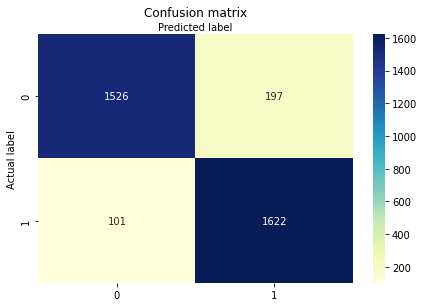

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels_resampled, pred_labels)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Neural Network Model

##Data , Labels

In [ ]:
labels = neural_df['LoanStatus']

In [ ]:
neural_df.drop('LoanStatus', axis=1, inplace=True)

In [ ]:
neural_df.shape

(28277, 17)

##Splitting

In [ ]:
temp_data,test_data, temp_labels, test_labels = train_test_split(neural_df, labels, train_size=0.8, stratify=labels,shuffle=True)

In [ ]:
train_data,val_data, train_labels, val_labels = train_test_split(temp_data, temp_labels, train_size=(7/8), stratify=temp_labels,shuffle=True)

##Feature scaling

In [ ]:
min_max_scaler_nn = preprocessing.MinMaxScaler()
normalized_train_data = min_max_scaler_nn.fit_transform(train_data)
normalized_test_data = min_max_scaler_nn.fit_transform(test_data)
normalized_val_data = min_max_scaler_nn.fit_transform(val_data)

##Model (data balanced)

undersampling (we will lose 40% of the data by doing undersampling but i am not sure is this the optimal solution or not)

In [ ]:
under_sam = RandomUnderSampler(random_state=0)
train_data_resampled,train_labels_resampled=under_sam.fit_resample(normalized_train_data,train_labels)
test_data_resampled,test_labels_resampled=under_sam.fit_resample(normalized_test_data,test_labels)
val_data_resampled,val_labels_resampled=under_sam.fit_resample(normalized_val_data,val_labels)

Checking that the data is balanced now

In [ ]:
print(np.unique(np.array(train_labels_resampled),return_counts=True))

(array([0, 1]), array([6029, 6029]))


In [ ]:
print(np.unique(np.array(test_labels_resampled),return_counts=True))

(array([0, 1]), array([1723, 1723]))


In [ ]:
print(np.unique(np.array(val_labels_resampled),return_counts=True))

(array([0, 1]), array([861, 861]))


In [ ]:
model = Sequential()
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1,"sigmoid"))
model.compile(loss='binary_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(0.001),metrics=['accuracy'])
model.fit(train_data_resampled,train_labels_resampled,batch_size=1024,epochs=1000,validation_data=(val_data_resampled,val_labels_resampled))

Epoch 1/1000
12/12 [==============================] - 1s 20ms/step - loss: 0.6753 - accuracy: 0.6210 - val_loss: 0.6506 - val_accuracy: 0.6835
Epoch 2/1000
12/12 [==============================] - 0s 8ms/step - loss: 0.6380 - accuracy: 0.6817 - val_loss: 0.6161 - val_accuracy: 0.6992
Epoch 3/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.6070 - accuracy: 0.6990 - val_loss: 0.5845 - val_accuracy: 0.7178
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.5764 - accuracy: 0.7145 - val_loss: 0.5502 - val_accuracy: 0.7398
Epoch 5/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.5370 - accuracy: 0.7500 - val_loss: 0.5132 - val_accuracy: 0.7764
Epoch 6/1000
12/12 [==============================] - 0s 9ms/step - loss: 0.4999 - accuracy: 0.7826 - val_loss: 0.4797 - val_accuracy: 0.8043
Epoch 7/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.4676 - accuracy: 0.8026 - val_loss: 0.4497 - val_accuracy: 0.8194
Ep

In [ ]:
pred_labels =model.predict(test_data_resampled)

In [ ]:
for x in range (0,len(pred_labels)):
  if pred_labels[x] < 0.5:
    pred_labels[x]=0
  else:
    pred_labels[x]=1

In [ ]:
print(metrics.classification_report(test_labels_resampled, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1723
           1       0.97      1.00      0.98      1723

    accuracy                           0.98      3446
   macro avg       0.98      0.98      0.98      3446
weighted avg       0.98      0.98      0.98      3446



Text(0.5, 257.44, 'Predicted label')

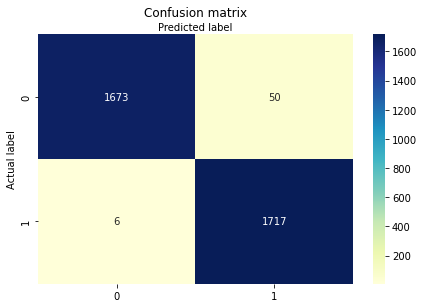

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels_resampled, pred_labels)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2304      
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3,605
Trainable params: 3,605
Non-trainable params: 0
_________________________________________________________________


#Naive Bayes Model

##Data , Labels

In [ ]:
labels = bayes_df['LoanStatus']

In [ ]:
bayes_df.drop('LoanStatus', axis=1, inplace=True)

In [ ]:
bayes_df.shape

(28277, 17)

##Splitting

In [ ]:
train_data,test_data, train_labels, test_labels = train_test_split(bayes_df, labels, train_size=0.8, stratify=labels,shuffle=True)

##Feature scaling

In [ ]:
min_max_scaler_nb = preprocessing.MinMaxScaler()
normalized_train_data = min_max_scaler_nb.fit_transform(train_data)
normalized_test_data = min_max_scaler_nb.fit_transform(test_data)

##Model (data balanced)

undersampling (we will lose 40% of the data by doing undersampling but i am not sure is this the optimal solution or not)

In [ ]:
under_sam = RandomUnderSampler(random_state=0)
train_data_resampled,train_labels_resampled=under_sam.fit_resample(normalized_train_data,train_labels)
test_data_resampled,test_labels_resampled=under_sam.fit_resample(normalized_test_data,test_labels)

Checking that the data is balanced now

In [ ]:
print(np.unique(np.array(train_labels_resampled),return_counts=True))

(array([0, 1]), array([6890, 6890]))


In [ ]:
print(np.unique(np.array(test_labels_resampled),return_counts=True))

(array([0, 1]), array([1723, 1723]))


In [ ]:
gnb = GaussianNB()
pred_labels = gnb.fit(train_data_resampled,train_labels_resampled).predict(test_data_resampled)

##Accuracy Results

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_labels_resampled, pred_labels)*100)

Accuracy: 71.67730702263493


In [ ]:
print(metrics.classification_report(test_labels_resampled, pred_labels))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1723
           1       0.77      0.63      0.69      1723

    accuracy                           0.72      3446
   macro avg       0.72      0.72      0.71      3446
weighted avg       0.72      0.72      0.71      3446



Text(0.5, 257.44, 'Predicted label')

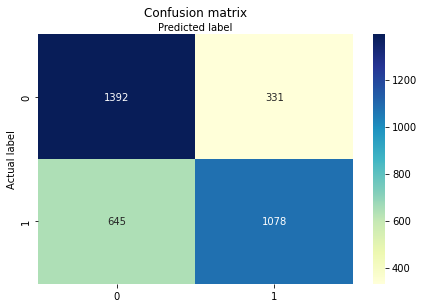

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels_resampled, pred_labels)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Decision Trees Model

##Data , Labels

In [ ]:
labels = trees_df['LoanStatus']

In [ ]:
trees_df.drop('LoanStatus', axis=1, inplace=True)

In [ ]:
trees_df.shape

(28277, 17)

##Splitting

In [ ]:
train_data,test_data, train_labels, test_labels = train_test_split(trees_df, labels, train_size=0.8, stratify=labels,shuffle=True)

##Feature scaling

In [ ]:
min_max_scaler_dt = preprocessing.MinMaxScaler()
normalized_train_data = min_max_scaler_dt.fit_transform(train_data)
normalized_test_data = min_max_scaler_dt.fit_transform(test_data)

##Model (data balanced)

undersampling (we will lose 40% of the data by doing undersampling but i am not sure is this the optimal solution or not)

In [ ]:
under_sam = RandomUnderSampler(random_state=0)
train_data_resampled,train_labels_resampled=under_sam.fit_resample(normalized_train_data,train_labels)
test_data_resampled,test_labels_resampled=under_sam.fit_resample(normalized_test_data,test_labels)

Checking that the data is balanced now

In [ ]:
print(np.unique(np.array(train_labels_resampled),return_counts=True))

(array([0, 1]), array([6890, 6890]))


In [ ]:
print(np.unique(np.array(test_labels_resampled),return_counts=True))

(array([0, 1]), array([1723, 1723]))


In [ ]:
clf = tree.DecisionTreeClassifier()
pred_labels = clf.fit(train_data_resampled,train_labels_resampled).predict(test_data_resampled)

##Accuracy Results

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_labels_resampled, pred_labels)*100)

Accuracy: 93.99303540336622


In [ ]:
print(metrics.classification_report(test_labels_resampled, pred_labels))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1723
           1       0.94      0.94      0.94      1723

    accuracy                           0.94      3446
   macro avg       0.94      0.94      0.94      3446
weighted avg       0.94      0.94      0.94      3446



Text(0.5, 257.44, 'Predicted label')

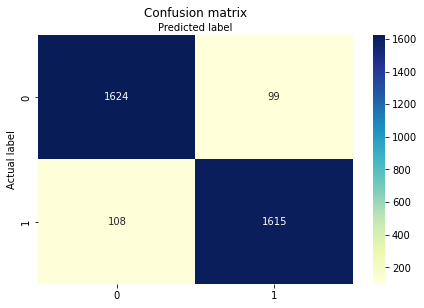

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_labels_resampled, pred_labels)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#Saving Models

* Logistic Regression Model

In [ ]:
filename = 'logistic_regression.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
filename = 'scaling_lr.sav'
pickle.dump(min_max_scaler_lr, open(filename, 'wb'))

* Neural Network Model

In [ ]:
save_model(model, 'neural_network.h5')

In [ ]:
filename = 'scaling_nn.sav'
pickle.dump(min_max_scaler_nn, open(filename, 'wb'))

* Naive Bayes Model

In [ ]:
filename = 'naive_bayes.sav'
pickle.dump(gnb, open(filename, 'wb'))

In [ ]:
filename = 'scaling_nb.sav'
pickle.dump(min_max_scaler_nb, open(filename, 'wb'))

* Decision Trees Model

In [ ]:
filename = 'Decision_trees.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
filename = 'scaling_tree.sav'
pickle.dump(min_max_scaler_dt, open(filename, 'wb'))